### The notebook every student writes their first year

#### Ok, I added some extra freaky bits -E. 

In [1]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
# set some plotting defaults
mpl.rc(('lines', 'axes') , linewidth=2)
mpl.rc(('xtick', 'ytick'), labelsize=15)
mpl.rc(('xtick.major', 'ytick.major'), width=2)
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['font.size'] = 18

Here we have the usual cell to control the inputs via commenting out lines.  This is a great trap for our future selves, because we can rerun this cell with different versions commented out, and then skip to other cells and get inconsistent results. 

In [3]:
# cat = fitsio.FITS('/global/cscratch1/sd/user/piff_cat_v1.fits')
cat = fitsio.FITS('../data/piff_sample_cat.fits')
# cat = fitsio.read('/global/cscratch1/sd/user/piff_cat_v3.fits')
cat[1].upper = True
cat = cat[1][:]
# cat = cat[1]['PSF_FWHM', 'BAND', 'FLUX', 'T_DATA', 'T_MODEL', 'G1_DATA', 'G1_MODEL', 'G2_DATA', 'G2_MODEL',
#              'GI_COLOR', 'IZ_COLOR'][:]

In [4]:
print(len(cat))
cat[0:5]

10000


array([(408706, 60, 'g', 1.14199996, 56.96976258, -31.59718291, 264993.53125   , 0.64444953, 0.64645623,  0.0389905 ,  0.04587981, -0.06593474, -0.06352551, 1.03892982, 0.14213055),
       (277634,  3, 'r', 1.02699995, 64.90827174, -40.04311361, 220186.1875    , 0.46669364, 0.46764273,  0.04881256,  0.04596845,  0.05852563,  0.05767505, 2.64429665, 0.48517472),
       (399296,  8, 'r', 0.80400002, 59.35649139, -35.19324925,   6602.23535156, 0.26852787, 0.28486449,  0.02199268,  0.04495019,  0.09234789,  0.02091354, 2.04515743, 0.26174375),
       (402665, 28, 'i', 0.78299999, 48.19553778, -32.2895479 ,  21204.59765625, 0.28805372, 0.28961244, -0.02106812, -0.00380901,  0.02068192,  0.03032147, 3.46553493, 0.78136057),
       (403419, 17, 'z', 0.80299997, 45.76110857, -34.54298415, 196801.15625   , 0.31799797, 0.32161818, -0.00646819, -0.00894779,  0.00202679, -0.00494676, 2.26951218, 0.38280857)],
      dtype=[('EXPNUM', '>i8'), ('CCDNUM', '>i2'), ('BAND', '<U20'), ('PSF_FWHM', '>f8'),

This next cell is pretty cool, it is commented out, but the value of '77978603' was cached the first time I ran it

In [5]:
# optional cut on Gaia matches
# cat = cat[cat['BDF_MAG_G_CORRECTED'] > 0]
# print(len(cat))

Here we have a pretty standard cell where we correct the input values. This is a really great programming trap for our future selves because at some point we are gonna switch to new versions of the input file with the correct input values. In fact, it turns out this has been actually been corrected in the sample catalog (and in Piff), so this cell gives incorrect results.

In [6]:
#correct for Piff returning sigma for T
cat['T_DATA'] = 2*cat['T_DATA']**2
cat['T_MODEL'] = 2*cat['T_MODEL']**2

### General catalog statistics

(note that we are defining 'bands' here, but we are gonna be redefining it a number of times elsewhere in the NB)

In [7]:
bands = 'grizY'
for band in bands:
    print('{}-band star count: {}'.format(band, len(cat[cat['BAND'] == band])))

g-band star count: 2216
r-band star count: 2523
i-band star count: 2687
z-band star count: 2574
Y-band star count: 0


In [8]:
# optional cut on size
# cat = cat[cat['T_DATA'] < 1.5]
# for band in bands:
#     print('{}-band star count: {}'.format(band, len(cat[cat['BAND'] == band])))

In [9]:
bands = 'griz'

In [10]:
print('Number of exposures: {}'.format(len(np.unique(cat['EXPNUM']))))

Number of exposures: 2568


In [11]:
u_exp_ccd, nstars = np.unique(np.stack((cat['EXPNUM'], cat['CCDNUM']), axis=1), axis=0, return_counts=True)

In [12]:
print('Number of unique exposure, CCD pairs: {}'.format(len(u_exp_ccd)))

Number of unique exposure, CCD pairs: 9649


In [13]:
print(u_exp_ccd); print(nstars)

[[238117      6]
 [238117     31]
 [238117     58]
 ...
 [410536     36]
 [410536     48]
 [410536     62]]
[1 1 1 ... 1 1 1]


This cell only really works for the full catalog.

Text(0.5, 0, 'Nstars / CCD')

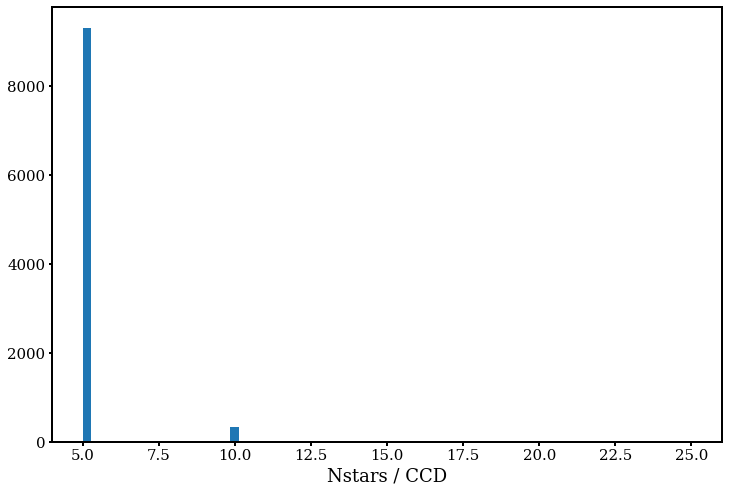

In [14]:
#rough histogram of nstars/CCD
fig = plt.figure(figsize=(12, 8))
plt.hist(nstars*5, bins=70) #these are the 20% reserve stars, so multiply by 5
plt.xlabel('Nstars / CCD')

In [15]:
print(min(nstars), max(nstars))

1 5


RA:  37.5258781445393 72.55302255126954 DEC:  -42.11796754316516 -18.528632920969937


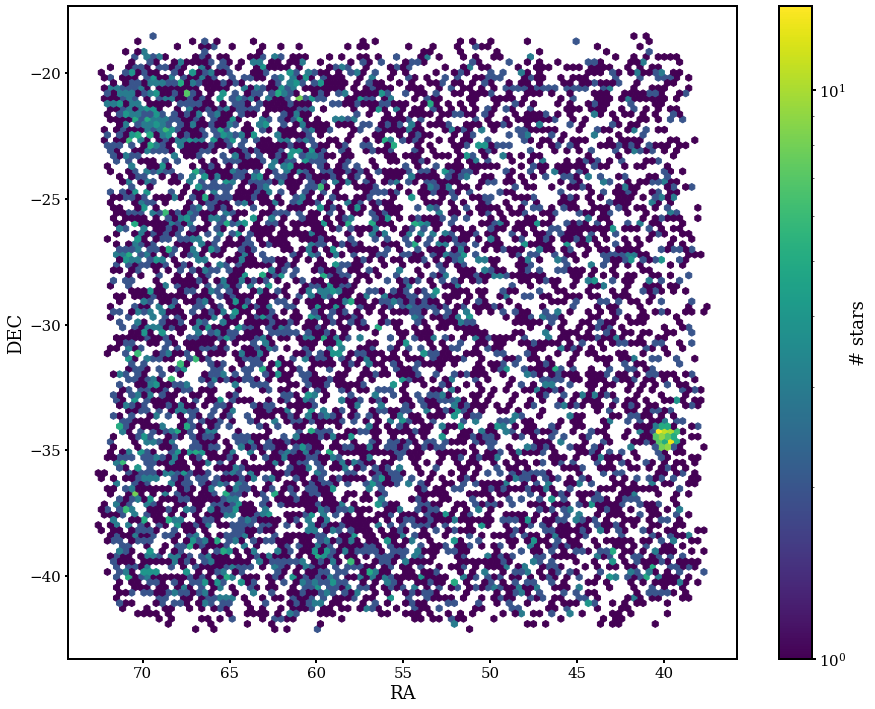

In [16]:
#plot footprint
print('RA: ', min(cat['RA']), max(cat['RA']), 
      'DEC: ', min(cat['DEC']), max(cat['DEC']))

fig, ax = plt.subplots(1,1, figsize=(15,12))
#plot g-r_color vs g_mag 2d histogram with log density
catra = cat['RA']
catra[catra > 180.] -= 360.
im = ax.hexbin(catra, cat['DEC'], bins='log', mincnt=1)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('# stars')
ax.invert_xaxis()
#ax.set_ylim(cat['dec'].min(), cat['dec'].max())
plt.show()

In [17]:
# bands = 'griz'
# banddict = {}
# for band in bands:
#     banddict[band] = cat[cat['BAND'] == band]

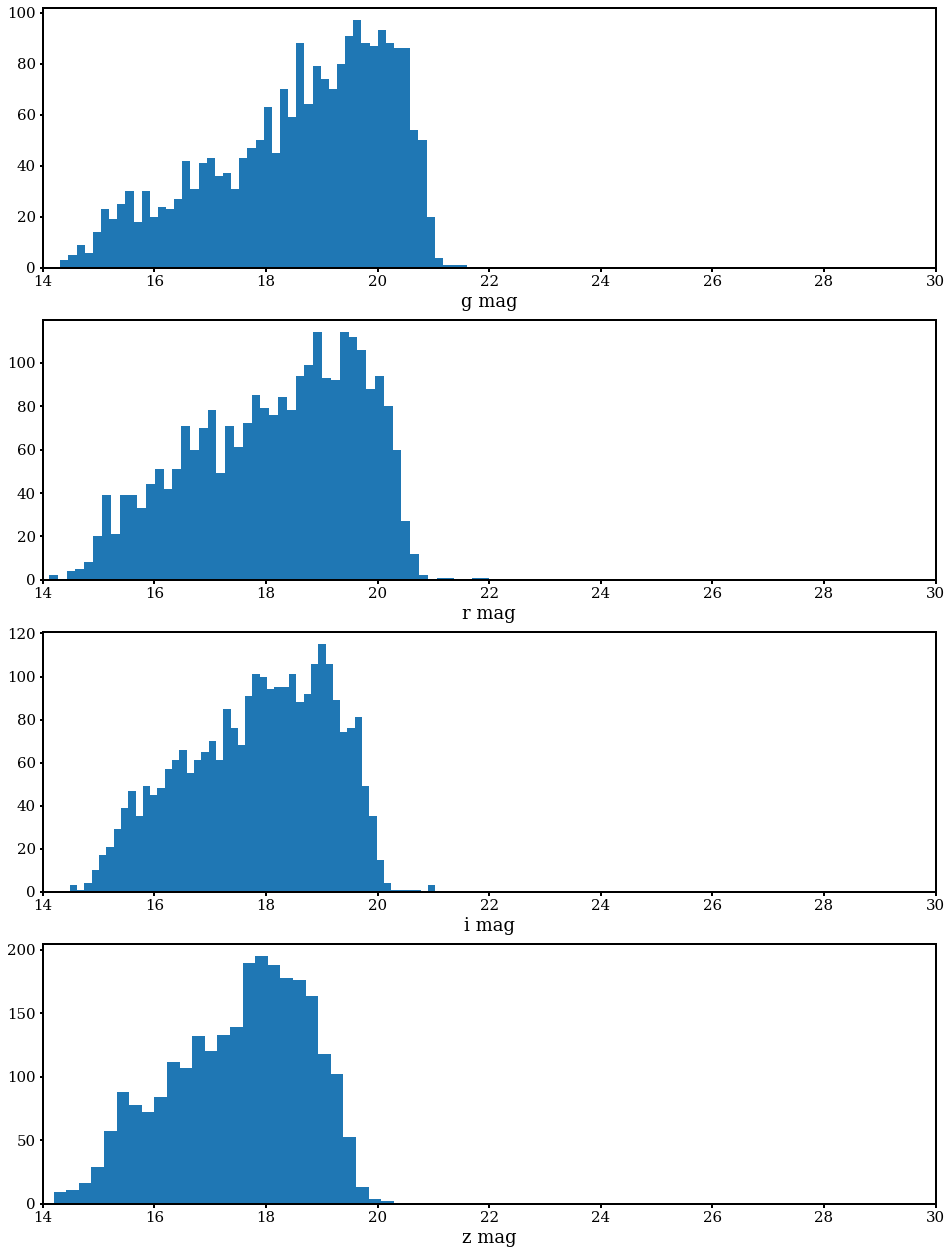

In [18]:
fig, axs = plt.subplots(4, 1, figsize=(16,22))
for i, band in enumerate(bands):
    flux = cat['FLUX'][cat['BAND'] == band]
    zeropt = 30.
    mag = zeropt - 2.5*np.log10(flux)
    ax = axs[i]
    ax.hist(mag, bins=50)
    ax.set_xlabel('{} mag'.format(band))
    ax.set_xlim(14, 30)

g 14.314759729833689 21.60806639674206
r 14.113801018300718 22.00666843253018
i 14.48537505474948 21.03266091991628
z 14.197015962892095 25.483320660130623


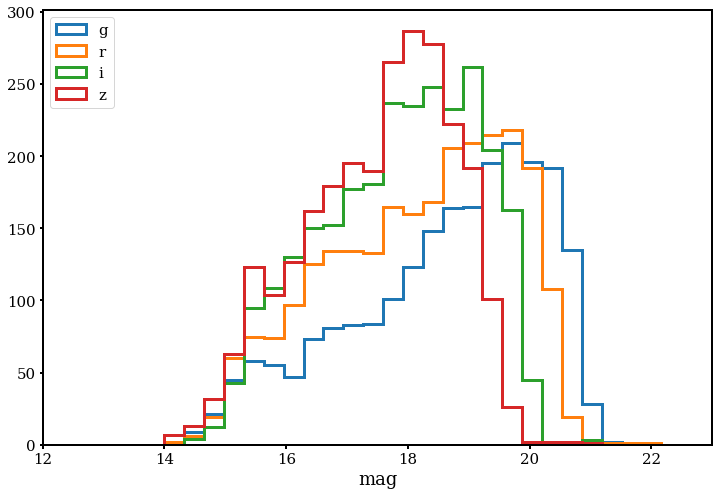

In [19]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
bins = np.linspace(14, 30, 50)
for i, band in enumerate(bands):
    flux = cat['FLUX'][cat['BAND'] == band]
    zeropt = 30.
    mag = zeropt - 2.5*np.log10(flux)
    print(band, min(mag), max(mag))
    ax.hist(mag, bins=bins, histtype='step', label=band, lw=3)
    ax.legend()
    ax.set_xlim(12, 23)
    ax.set_xlabel('mag')

In [20]:
for band in bands:
    if band == 'z':
        color = 'IZ_COLOR'
    else:
        color = 'GI_COLOR'
    chist = cat[color][cat['BAND'] == band]
    print(min(chist), max(chist))

0.005269127897918224 3.4312641620635986
0.005213983356952667 3.488983392715454
0.02991614118218422 3.49763822555542
0.00010386291978647932 0.6994118094444275


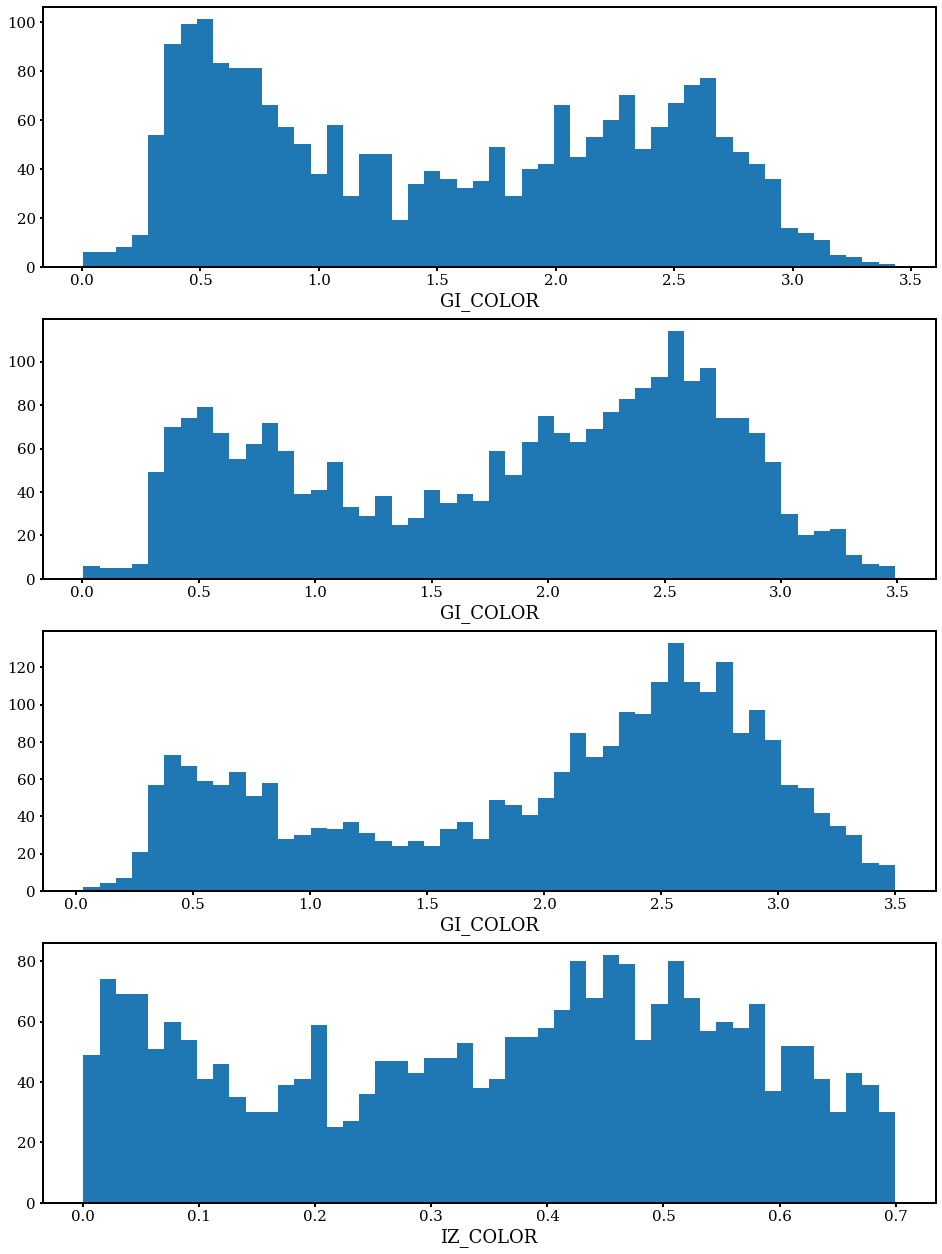

In [22]:
#plot color distribution per band
fig, axs = plt.subplots(4, 1, figsize=(16,22))
for i, band in enumerate(bands):
    if band == 'z':
        color = 'IZ_COLOR'
    else:
        color = 'GI_COLOR'
    chist = cat[color][cat['BAND'] == band]
    ax = axs[i]
    ax.hist(chist, bins=50)
    ax.set_xlabel(color)

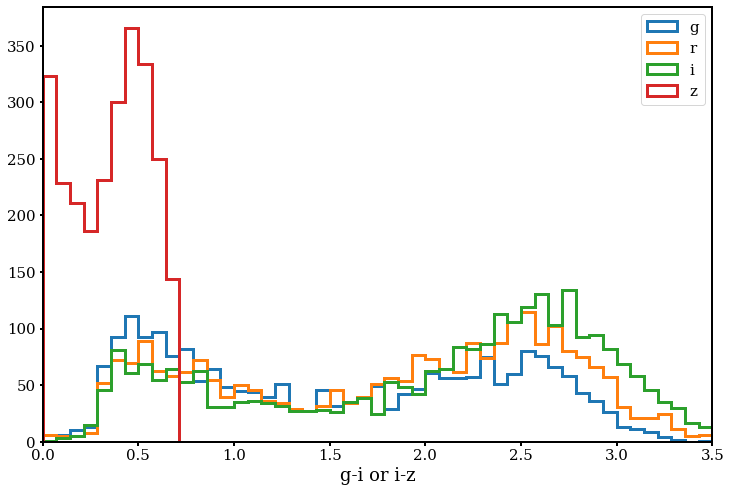

In [23]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
bins = np.linspace(0, 3.5, 50)
for i, band in enumerate(bands):
    if band == 'z':
        color = 'IZ_COLOR'
    else:
        color = 'GI_COLOR'
    chist = cat[color][cat['BAND'] == band]
    ax.hist(chist, bins=bins, histtype='step', label=band, lw=3)
    ax.legend()
    ax.set_xlim(0, 3.5)
    ax.set_xlabel('g-i or i-z')

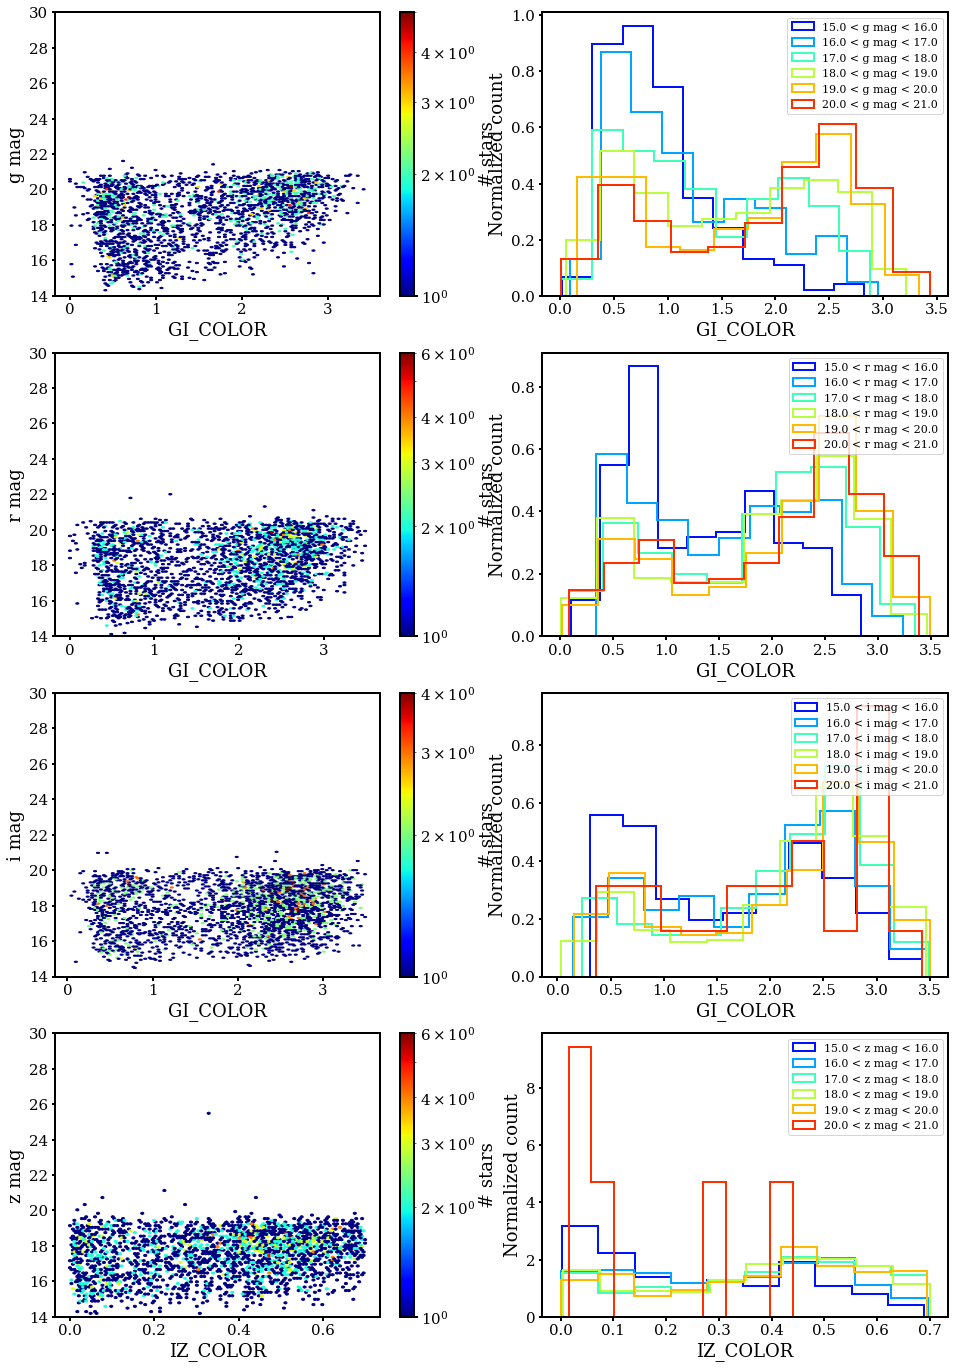

In [24]:
#plot color vs mag per band
fig, axs = plt.subplots(4,2, figsize=(16,24))
cmap = plt.get_cmap('jet')
for i, band in enumerate(bands):
    ax = axs[i][0]
    #plot g-r_color vs g_mag 2d histogram with log density
    if band == 'z':
        color = 'IZ_COLOR'
    else:
        color = 'GI_COLOR'
    chist = cat[color][cat['BAND'] == band]
    flux = cat['FLUX'][cat['BAND'] == band]
    zeropt = 30.
    mag = zeropt - 2.5*np.log10(flux)
    im = ax.hexbin(chist, mag, bins='log', mincnt=1, cmap=cmap)
    ax.set_ylim(14,30)
    ax.set_ylabel('{} mag'.format(band))
    ax.set_xlabel(color)
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('# stars')
    
    #plot color histogram in mag slices
    ax = axs[i][1]
    nbins = 7
    cbins = np.linspace(15., 21., nbins)
    for i in range(len(cbins)-1):
        k = i+1
        mask = np.logical_and(np.greater_equal(mag, cbins[i]),
                              np.less(mag, cbins[k]))
        color_slice = chist[mask]
        loedge = '{0:3.1f}'.format(cbins[i])
        hiedge = '{0:3.1f}'.format(cbins[k])
        ax.hist(color_slice, density=True, 
                    label='{} < {} mag < {}'.format(loedge, band, hiedge),
                    histtype='step', lw=2, color=cmap(k/nbins))
        ax.legend(ncol=1, fontsize=11)
        ax.set_xlabel(color)
        ax.set_ylabel('Normalized count')

Remember we are mistakenly plotting the square of all T values!

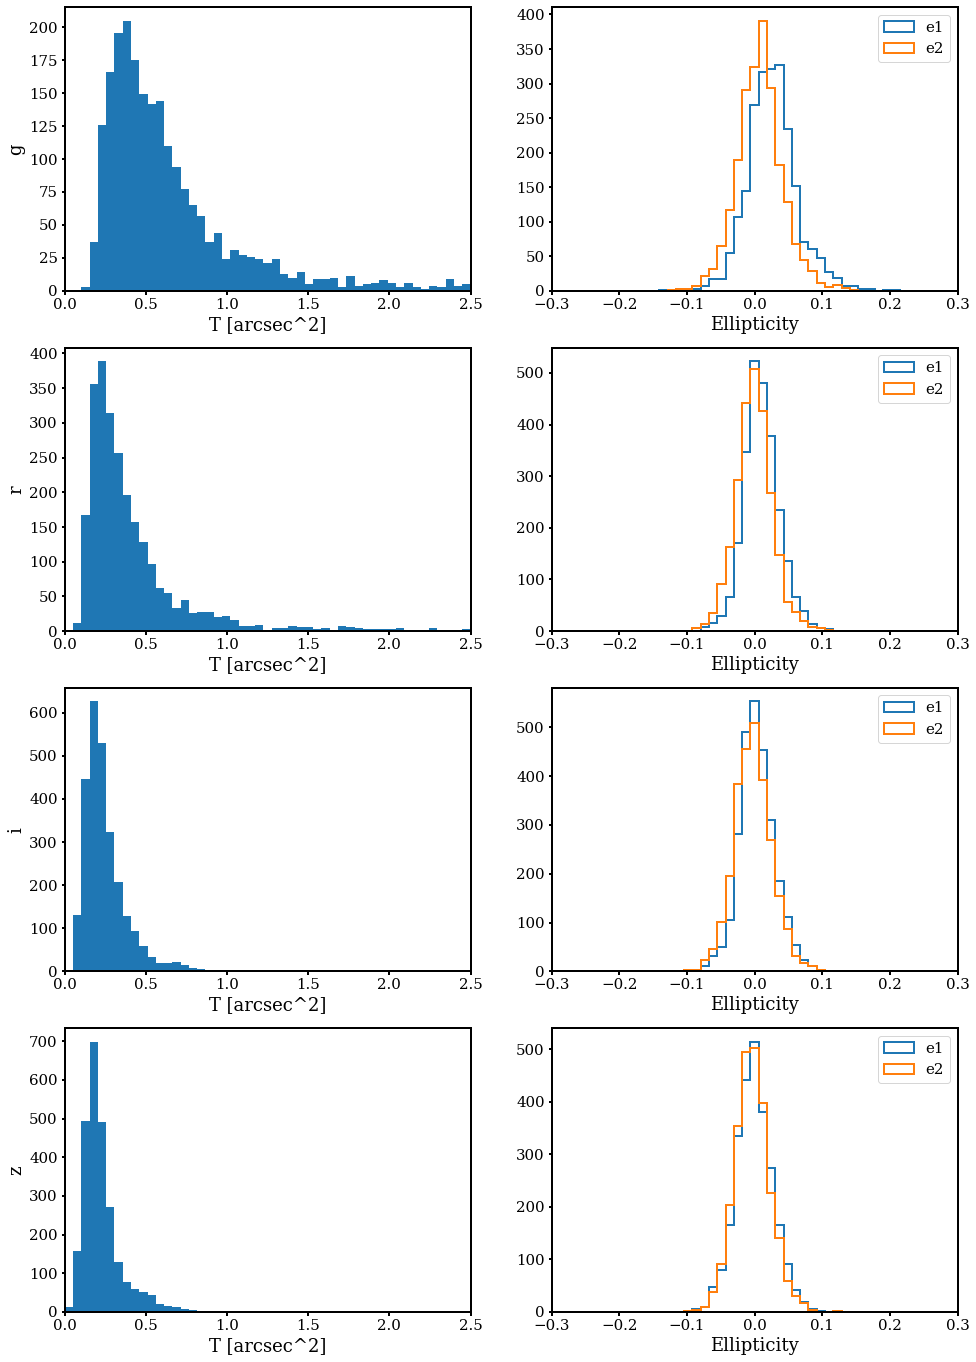

In [25]:
fig, axs = plt.subplots(4,2, figsize=(16,24))
for i, band in enumerate(bands):
    ax = axs[i][0]
    # plot size histogram
    size = cat['T_DATA'][cat['BAND'] == band]
    ax.hist(size, bins=np.linspace(0, 2.5, 50))
    ax.set_xlim(0, 2.5)
    ax.set_xlabel('T [arcsec^2]')
    ax.set_ylabel(band)
    
    #plot e1 and e2 histograms
    ax = axs[i][1]
    e1 = cat['G1_DATA'][cat['BAND'] == band]
    e2 = cat['G2_DATA'][cat['BAND'] == band]
    ax.hist(e1, bins=np.linspace(-0.3, 0.3, 50), histtype='step', label='e1', lw=2)
    ax.hist(e2, bins=np.linspace(-0.3, 0.3, 50), histtype='step', label='e2', lw=2)
    ax.set_xlim(-0.3, 0.3)
    ax.legend()
    ax.set_xlabel('Ellipticity')

Note many incorrect comments in the following plots due to copypasting code.

g mean, median, std: (0.7012172505441538, 0.528781939708614, 0.5613669987740278)
r mean, median, std: (0.4180926673709904, 0.30909471005035866, 0.3516403374794365)
i mean, median, std: (0.25265306363976126, 0.21557265395323938, 0.14821846007032416)
z mean, median, std: (0.24191460934242506, 0.19934021485583098, 0.1980433177575008)


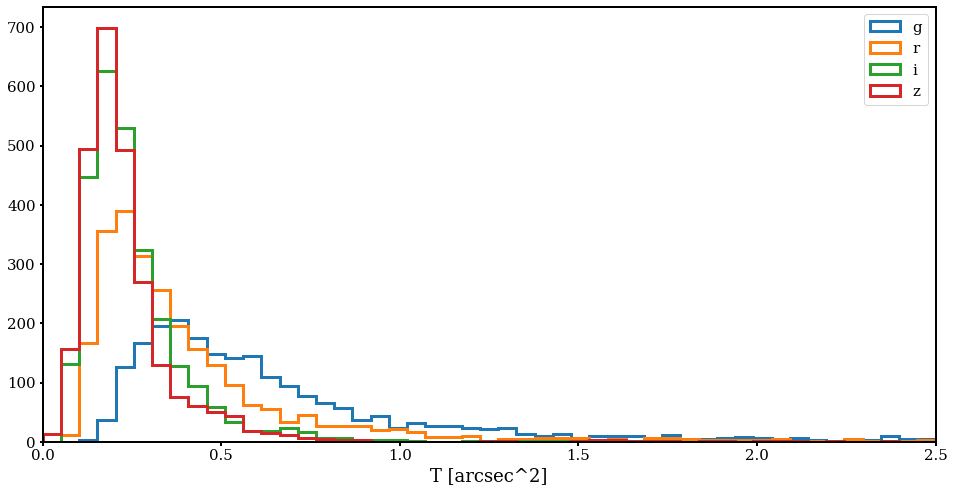

In [26]:
#plot color vs mag per band on one ax
fig, axs = plt.subplots(1,1, figsize=(16,8))
for i, band in enumerate(bands):
    ax = axs
    # plot size histogram
    size = cat['T_DATA'][cat['BAND'] == band]
    print('{} mean, median, std: {}'.format(band, (np.mean(size),
                                                   np.median(size),
                                                   np.std(size))))
    ax.hist(size, np.linspace(0, 2.5, 50), label=band, histtype='step', lw=3)
    ax.set_xlim(0, 2.5)
    ax.legend()
    ax.set_xlabel('T [arcsec^2]')

g mean, median, std: (0.7012172505441538, 0.528781939708614, 0.5613669987740278)
r mean, median, std: (0.4180926673709904, 0.30909471005035866, 0.3516403374794365)
i mean, median, std: (0.25265306363976126, 0.21557265395323938, 0.14821846007032416)
z mean, median, std: (0.24191460934242506, 0.19934021485583098, 0.1980433177575008)


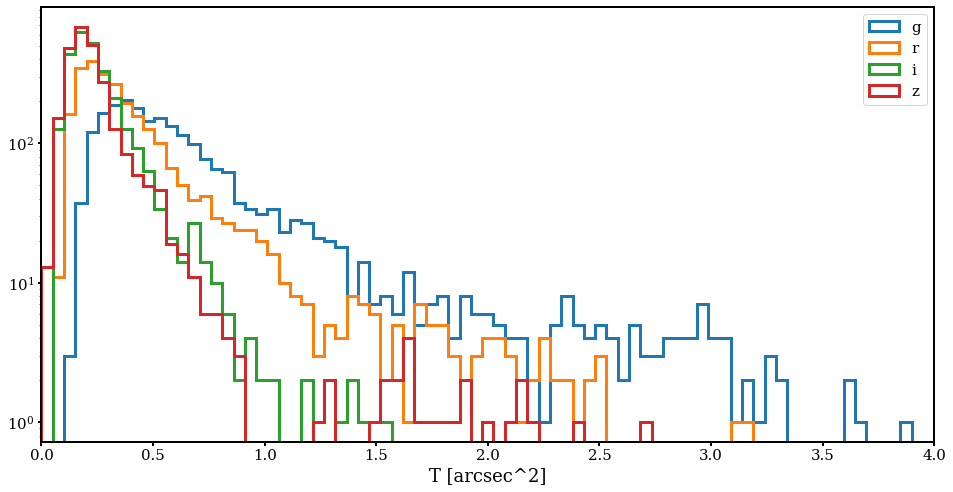

In [27]:
#plot color vs mag per band on one ax
fig, axs = plt.subplots(1,1, figsize=(16,8))
for i, band in enumerate(bands):
    ax = axs
    # plot size histogram
    size = cat['T_DATA'][cat['BAND'] == band]
    print('{} mean, median, std: {}'.format(band, (np.mean(size),
                                                   np.median(size),
                                                   np.std(size))))
    ax.hist(size, np.linspace(0, 4.0, 80), label=band, histtype='step', lw=3)
    ax.set_xlim(0, 4.0)
    ax.set_yscale('log')
    ax.legend()
    ax.set_xlabel('T [arcsec^2]')

In [28]:
#plot color vs mag per band on one ax
for i, band in enumerate(bands):
    size = cat['PSF_FWHM'][cat['BAND'] == band]
    print('{} mean, median, std: {}'.format(band, (np.mean(size),
                                                   np.median(size),
                                                   np.std(size))))

g mean, median, std: (1.1111245479179204, 1.0720000267028809, 0.17044395740059343)
r mean, median, std: (0.9716068161322964, 0.9430000185966492, 0.150206857486373)
i mean, median, std: (0.8711540751134236, 0.859000027179718, 0.10180295978255322)
z mean, median, std: (0.8487198918988377, 0.8349999785423279, 0.11124924448432608)


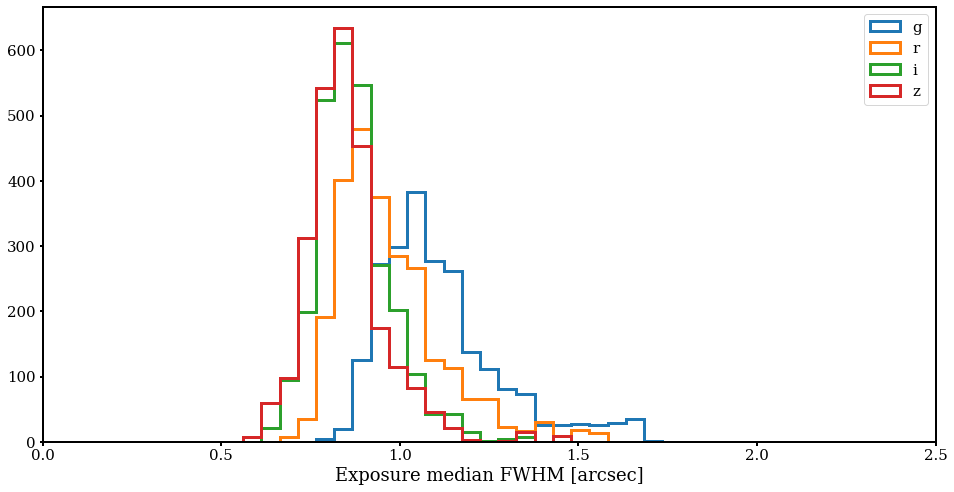

In [29]:
#plot color vs mag per band on one ax
fig, axs = plt.subplots(1,1, figsize=(16,8))
for i, band in enumerate(bands):
    ax = axs
    # plot size histogram
    size = cat['PSF_FWHM'][cat['BAND'] == band]
    ax.hist(size, np.linspace(0, 2.5, 50), label=band, histtype='step', lw=3)
    ax.set_xlim(0, 2.5)
    ax.legend()
    ax.set_xlabel('Exposure median FWHM [arcsec]')

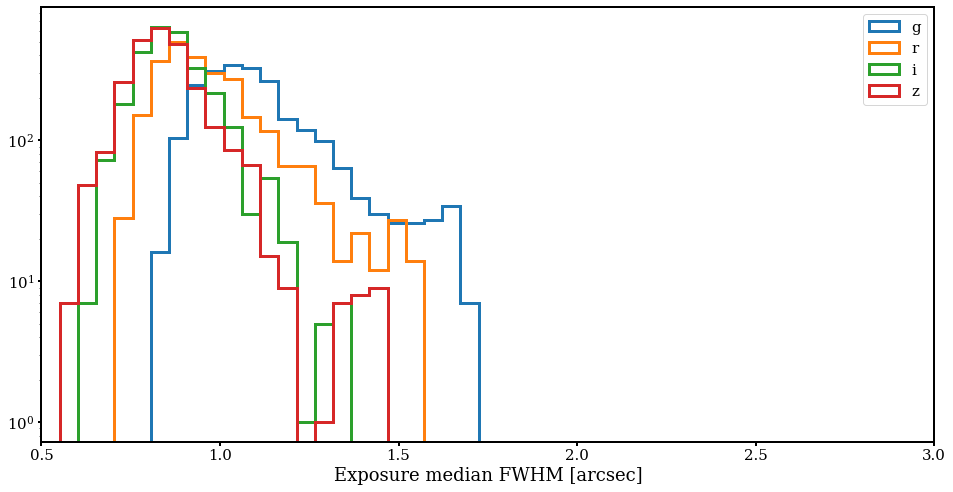

In [30]:
#plot color vs mag per band on one ax
fig, axs = plt.subplots(1,1, figsize=(16,8))
for i, band in enumerate(bands):
    ax = axs
    # plot size histogram
    size = cat['PSF_FWHM'][cat['BAND'] == band]
    ax.hist(size, np.linspace(0.5, 3.0, 50), label=band, histtype='step', lw=3)
    ax.set_xlim(0.5, 3.0)
    ax.set_yscale('log')
    ax.legend()
    ax.set_xlabel('Exposure median FWHM [arcsec]')

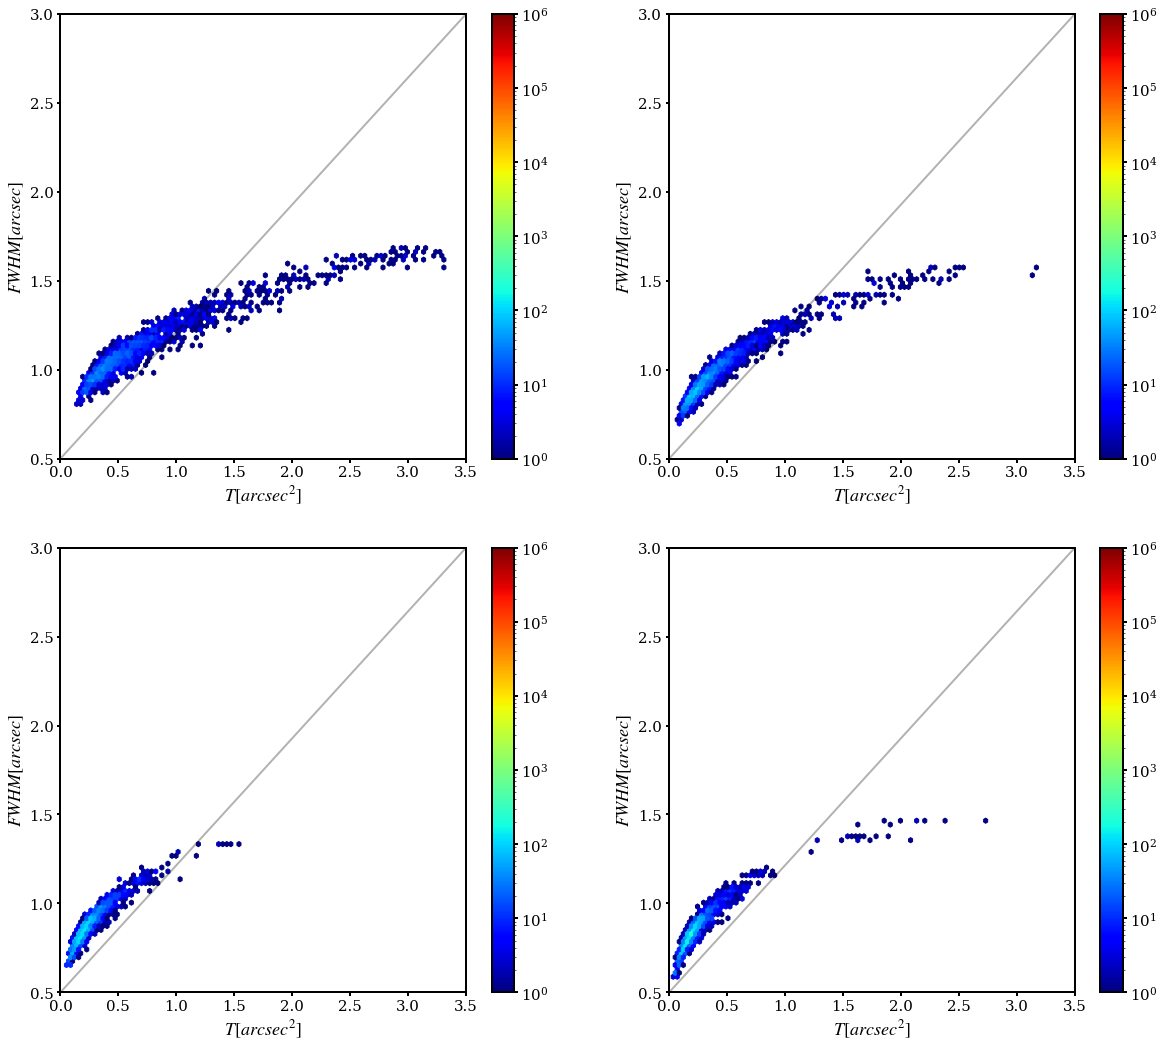

In [31]:
##plot T vs. FWHM correlation
fig, axs = plt.subplots(2,2, figsize=(20,18))
for i, band in enumerate('griz'):
    # <T> vs (color, mag)
    ax = axs[int(i/2)][i%2]
    # if band == 'z':
    #     color = 'IZ_COLOR'
    #     cmax = 0.7
    # else:
    #     color = 'GI_COLOR'
    #     cmax = 3.5
    data = cat[cat['BAND'] == band]
    tsize = data['T_DATA']
    fwhm = data['PSF_FWHM']
    
    cmap = plt.get_cmap('jet')
    im = ax.hexbin(tsize, fwhm, mincnt=1, bins='log', cmap=cmap, extent=(0, 3.5, 0.5, 3.0),
                   vmin=1., vmax=1e6)
    ax.plot(np.linspace(0,3.5,2),np.linspace(0.5,3.,2), c='k', alpha=0.3)
    # ax.set_aspect('equal')
    ax.set_xlim(0, 3.5)
    ax.set_ylim(0.5, 3.0)
    ax.set_xlabel(r'$T [arcsec^2]$')
    ax.set_ylabel(r'$FWHM [arcsec]$')
    cbar = plt.colorbar(im, ax=ax)
    #cbar.set_label(r'$\left<T_{\mathrm{PSF}}\right>$')


This duplicated plot is meant to only be run when there is a selection cut on T or FWHM.

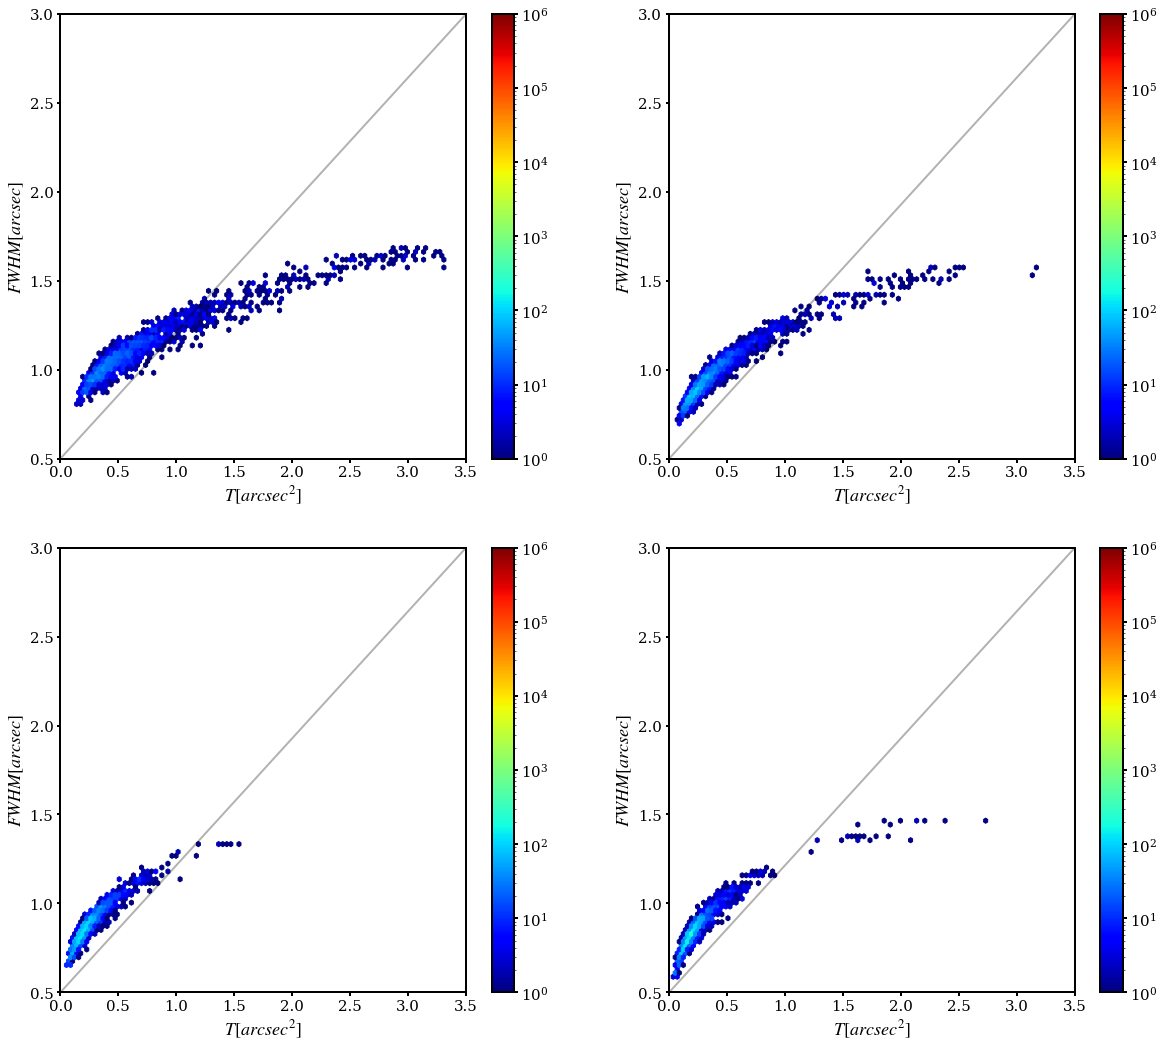

In [32]:
##plot T vs. FWHM correlation
fig, axs = plt.subplots(2,2, figsize=(20,18))
for i, band in enumerate('griz'):
    # <T> vs (color, mag)
    ax = axs[int(i/2)][i%2]
    # if band == 'z':
    #     color = 'IZ_COLOR'
    #     cmax = 0.7
    # else:
    #     color = 'GI_COLOR'
    #     cmax = 3.5
    data = cat[cat['BAND'] == band]
    tsize = data['T_DATA']
    fwhm = data['PSF_FWHM']
    
    cmap = plt.get_cmap('jet')
    im = ax.hexbin(tsize, fwhm, mincnt=1, bins='log', cmap=cmap, extent=(0, 3.5, 0.5, 3.0),
                   vmin=1., vmax=1e6)
    ax.plot(np.linspace(0,3.5,2),np.linspace(0.5,3.,2), c='k', alpha=0.3)
    # ax.set_aspect('equal')
    ax.set_xlim(0, 3.5)
    ax.set_ylim(0.5, 3.0)
    ax.set_xlabel(r'$T [arcsec^2]$')
    ax.set_ylabel(r'$FWHM [arcsec]$')
    cbar = plt.colorbar(im, ax=ax)
    #cbar.set_label(r'$\left<T_{\mathrm{PSF}}\right>$')


In [33]:
def bin_by_color(m, dT, ax, cmin=0., cmax=3.5, tmin=0., tmax=1., min_mused=None):

    mag_bins = np.linspace(cmin, cmax, 30)
    print('col_bins = ',mag_bins)

    index = np.digitize(m, mag_bins)
    bin_dT = [dT[index == i].mean() for i in range(1, len(mag_bins))]
    print('bin_dT = ',bin_dT)
    bin_dT_err = [ np.sqrt(dT[index == i].var() / len(dT[index == i]))
                    for i in range(1, len(mag_bins)) ]
    print('bin_dT_err = ',bin_dT_err)

    # Fix up nans
    for i in range(1,len(mag_bins)):
        if i not in index:
            bin_dT[i-1] = 0.
            bin_dT_err[i-1] = 0.
    
    ax.set_ylim(tmin, tmax)
    #ax.plot([cmin,cmax], [0,0], color='black')
    #ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    #ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    t_line = ax.errorbar(mag_bins[:-1], bin_dT, yerr=bin_dT_err, color='b', fmt='o')
    #ax.axhline(y=0.003, linewidth=4, color='grey')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.set_ylabel(r'$\left<T_{data}\right> \quad({\rm arcsec}^2)$')
    ax.set_xlabel(color)
    plt.tight_layout()

col_bins =  [0.         0.12068966 0.24137931 0.36206897 0.48275862 0.60344828
 0.72413793 0.84482759 0.96551724 1.0862069  1.20689655 1.32758621
 1.44827586 1.56896552 1.68965517 1.81034483 1.93103448 2.05172414
 2.17241379 2.29310345 2.4137931  2.53448276 2.65517241 2.77586207
 2.89655172 3.01724138 3.13793103 3.25862069 3.37931034 3.5       ]
bin_dT =  [0.8375531372774017, 0.7290646705713635, 0.7166689517732363, 0.8636009744493673, 0.7337536899783452, 0.7194897582351051, 0.6759522907975991, 0.7557965399552096, 0.7198995197754687, 0.7174919740563056, 0.7861652855086525, 0.8393077060610196, 0.665088845844282, 0.6566846819563747, 0.6592394620355189, 0.6434905613810228, 0.6938286312649603, 0.6421257921984734, 0.6333941062039633, 0.5865249634212079, 0.6623170797480179, 0.7665855100586174, 0.5674703281527019, 0.5975253516219653, 0.664541646601931, 0.8482911796777156, 0.483042565930837, 0.4531341319096237, 0.31998814215842725]
bin_dT_err =  [0.23496533674099215, 0.06906565021237744, 0.0644

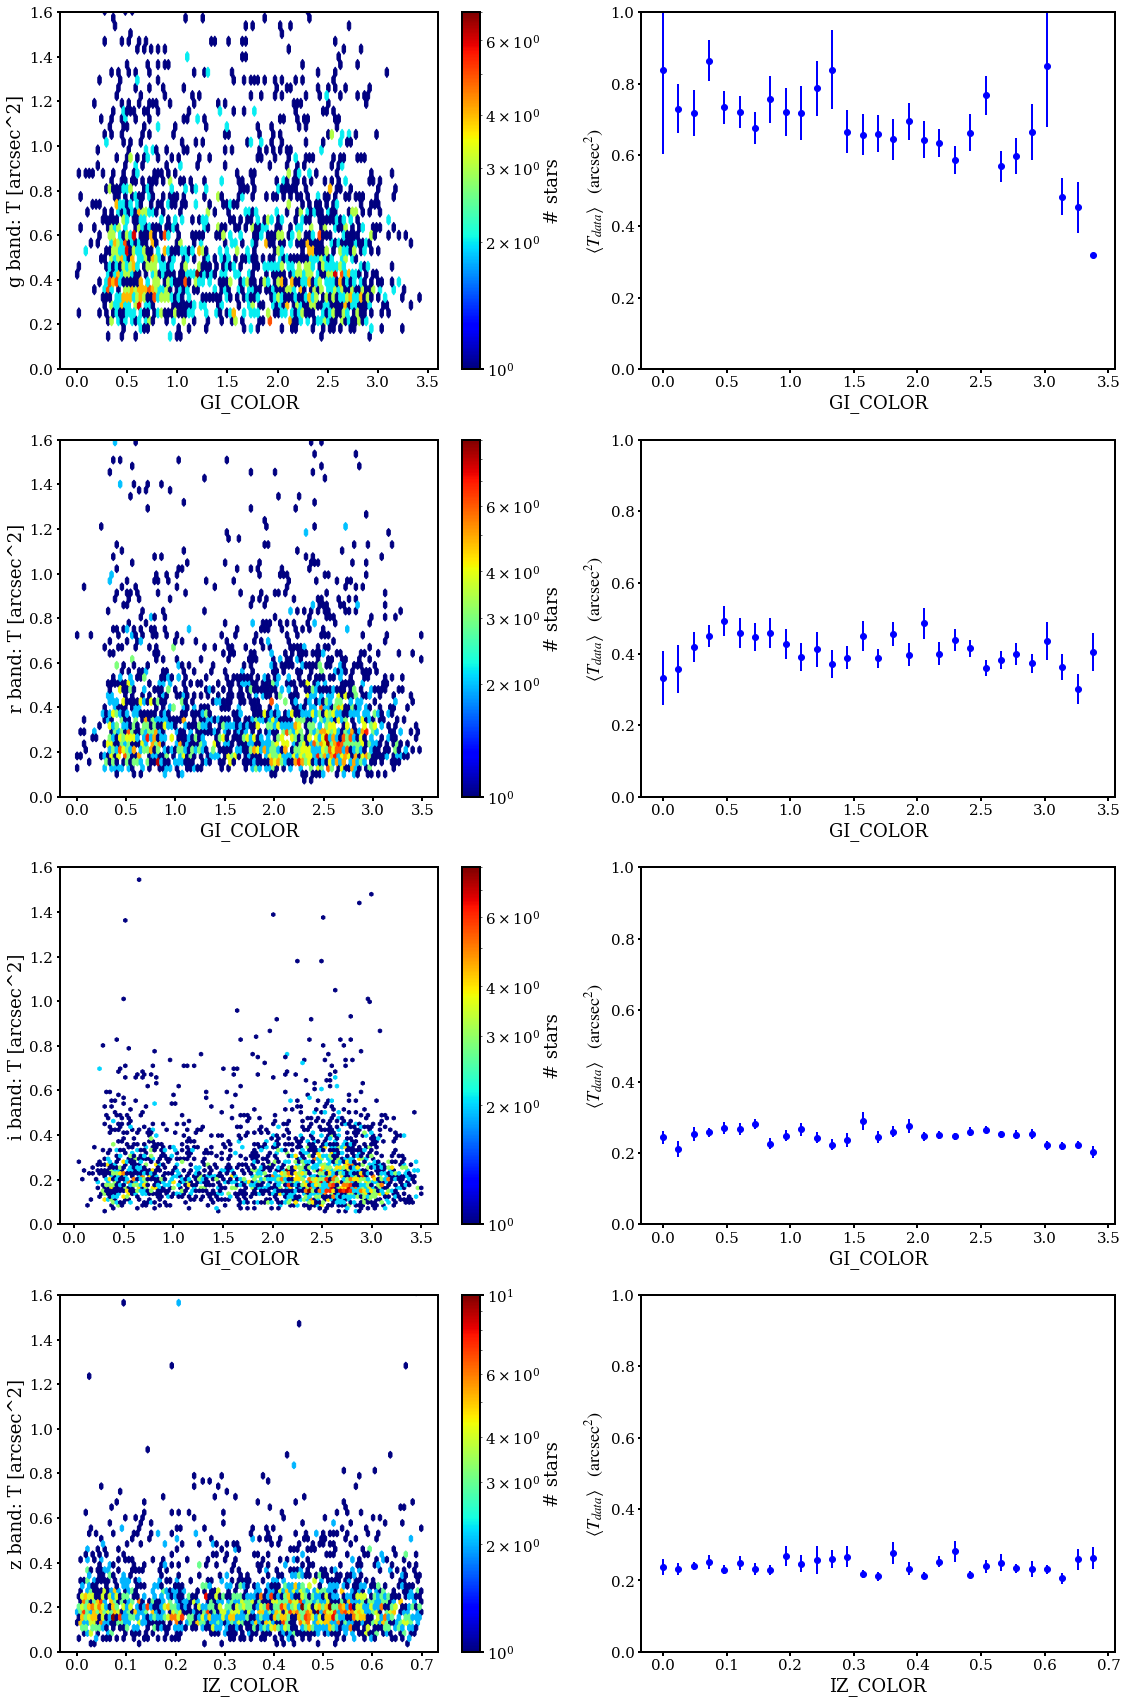

In [34]:
#plot size vs. color 2d hist and profile
fig, axs = plt.subplots(4,2, figsize=(16,24))
for i, band in enumerate(bands):
    ax = axs[i][0]
    #plot size vs color 2d hist with log density
    if band == 'z':
        color = 'IZ_COLOR'
    else:
        color = 'GI_COLOR'
    # cat = cat[cat['T_DATA'] < 2.5]
    chist = cat[color][cat['BAND'] == band]
    size = cat['T_DATA'][cat['BAND'] == band]
    cmap = plt.get_cmap('jet')
    im = ax.hexbin(chist, size, bins='log', mincnt=1, cmap=cmap)
    ax.set_ylim(0., 1.6)
    ax.set_ylabel('{} band: T [arcsec^2]'.format(band))
    ax.set_xlabel(color)
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('# stars')
    
    #plot size vs color profile
    ax = axs[i][1]
    nbins = 7
    if band == 'z':
        cmax = 0.7
    else:
        cmax = 3.5
    cbins = np.linspace(0., cmax, nbins)
    bin_by_color(chist, size, ax, cmax=cmax)

## Plotting shape residuals

### Residuals vs. color

In [35]:
def compute_res(d):
    
    de1 =  d['G1_DATA']-d['G1_MODEL']
    de2 =  d['G2_DATA']-d['G2_MODEL']
    dt =  d['T_DATA']-d['T_MODEL']
    dtfrac = dt/d['T_DATA']
    print('mean de = ',np.mean(de1),np.mean(de2))
    print('mean dt = ',np.mean(dt))

    return dtfrac, dt, de1, de2

In [36]:
def bin_res_by_color(m, dT, dTfrac, de1, de2, min_edge=0., max_edge=3.5):

    print(band, min_edge, max_edge)
    bins = np.linspace(min_edge, max_edge, 30)
    print('col_bins = ',bins)

    index = np.digitize(m, bins)
    #print('len(index) = ',len(index))
    bin_de1 = [de1[index == i].mean() for i in range(1, len(bins))]
    #print('bin_de1 = ',bin_de1)
    bin_de2 = [de2[index == i].mean() for i in range(1, len(bins))]
    #print('bin_de2 = ',bin_de2)
    bin_dT = [dT[index == i].mean() for i in range(1, len(bins))]
    #print('bin_dT = ',bin_dT)
    bin_dTfrac = [dTfrac[index == i].mean() for i in range(1, len(bins))]
    #print('bin_dTfrac = ',bin_dTfrac)
    bin_de1_err = [ np.sqrt(de1[index == i].var() / len(de1[index == i]))
                    for i in range(1, len(bins)) ]
    #print('bin_de1_err = ',bin_de1_err)
    bin_de2_err = [ np.sqrt(de2[index == i].var() / len(de2[index == i]))
                    for i in range(1, len(bins)) ]
    #print('bin_de2_err = ',bin_de2_err)
    bin_dT_err = [ np.sqrt(dT[index == i].var() / len(dT[index == i]))
                    for i in range(1, len(bins)) ]
    #print('bin_dT_err = ',bin_dT_err)
    bin_dTfrac_err = [ np.sqrt(dTfrac[index == i].var() / len(dTfrac[index == i]))
                    for i in range(1, len(bins)) ]
    #print('bin_dTfrac_err = ',bin_dTfrac_err)

    # Fix up nans
    for i in range(1,len(bins)):
        if i not in index:
            bin_de1[i-1] = 0.
            bin_de2[i-1] = 0.
            bin_dT[i-1] = 0.
            bin_dTfrac[i-1] = 0.
            bin_de1_err[i-1] = 0.
            bin_de2_err[i-1] = 0.
            bin_dT_err[i-1] = 0.
            bin_dTfrac_err[i-1] = 0.
    
    return (min_edge, max_edge, bins, bin_dT, bin_dT_err, bin_dTfrac, 
            bin_dTfrac_err, bin_de1, bin_de1_err, bin_de2, bin_de2_err)

In [37]:
def plot_bin_res(min_edge, max_edge, bins, bin_dT, bin_dT_err, bin_dTfrac, bin_dTfrac_err,
                 bin_de1, bin_de1_err, bin_de2, bin_de2_err, cutlim=None, Tlims=(-0.0075, 0.0075),
                 Tfraclims=(-0.02, 0.02), elims=(-6.e-4,6.e-4), label=None, axes=None):

    ax = axes[0]
    ax.set_title('{} band'.format(band))
    ax.set_ylim(Tlims)
    ax.plot([min_edge,max_edge], [0,0], color='black')
    if cutlim != None:  
        ax.plot([cutlim,cutlim],[-1,1], color='Grey')
        ax.fill( [min_edge,min_edge,cutlim,cutlim], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    t_line = ax.errorbar(bins[:-1], bin_dT, yerr=bin_dT_err, fmt='o', label=label)
    #ax.axhline(y=0.003, linewidth=4, color='grey')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model}) \quad({\rm arcsec}^2)$')

    ax = axes[1]
    ax.set_ylim(Tfraclims)
    ax.plot([min_edge,max_edge], [0,0], color='black')
    if cutlim != None:  
        ax.plot([cutlim,cutlim],[-1,1], color='Grey')
        ax.fill( [min_edge,min_edge,cutlim,cutlim], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    tfrac_line = ax.errorbar(bins[:-1], bin_dTfrac, yerr=bin_dTfrac_err, label=label, fmt='o')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model})/ T_{\rm PSF}$')

    ax = axes[2]
    ax.set_ylim(elims)
    ax.plot([min_edge,max_edge], [0,0], color='black')
    if cutlim != None:  
        ax.plot([cutlim,cutlim],[-1,1], color='Grey')
        ax.fill( [min_edge,min_edge,cutlim,cutlim], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    e1_line = ax.errorbar(bins[:-1], bin_de1, yerr=bin_de1_err, label=label, fmt='o')
    #e2_line = ax.errorbar(bins[:-1], bin_de2, yerr=bin_de2_err, label=label, fmt='o')
    #ax.axhline(y=0.0002, linewidth=4, color='grey')
    #ax.axhline(y=-0.0002, linewidth=4, color='grey')
    #ax.legend()
    #ax.legend([e1_line, e2_line], [r'$e_1$', r'$e_2$'])
    ax.set_ylabel(r'$e_{\rm PSF} - e_{\rm model}$')
    ax.set_xlim(min_edge,max_edge)
    ax.set_xlabel(color)
    plt.tight_layout()

mean de =  0.00022047726889770937 3.378330033125623e-05
mean dt =  0.004042903215106737
g 0.0 3.5
col_bins =  [0.         0.12068966 0.24137931 0.36206897 0.48275862 0.60344828
 0.72413793 0.84482759 0.96551724 1.0862069  1.20689655 1.32758621
 1.44827586 1.56896552 1.68965517 1.81034483 1.93103448 2.05172414
 2.17241379 2.29310345 2.4137931  2.53448276 2.65517241 2.77586207
 2.89655172 3.01724138 3.13793103 3.25862069 3.37931034 3.5       ]
mean de =  0.00014870929995198544 2.443059418095236e-05
mean dt =  1.3832648330946608e-05
r 0.0 3.5
col_bins =  [0.         0.12068966 0.24137931 0.36206897 0.48275862 0.60344828
 0.72413793 0.84482759 0.96551724 1.0862069  1.20689655 1.32758621
 1.44827586 1.56896552 1.68965517 1.81034483 1.93103448 2.05172414
 2.17241379 2.29310345 2.4137931  2.53448276 2.65517241 2.77586207
 2.89655172 3.01724138 3.13793103 3.25862069 3.37931034 3.5       ]
mean de =  0.0001641452875968271 9.20914224223563e-05
mean dt =  0.00015818190563034111
i 0.0 3.5
col_bins

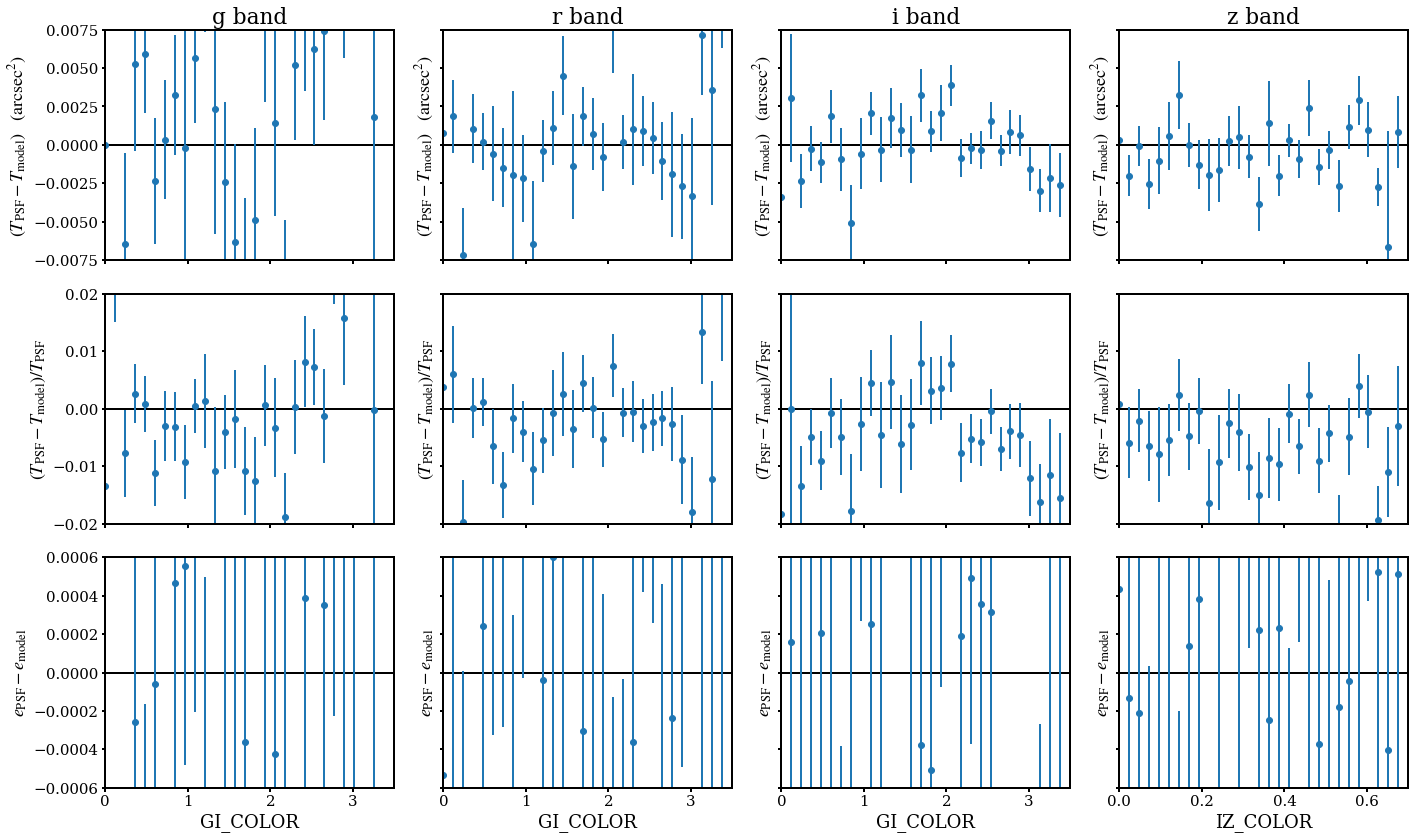

In [38]:
fig, axes = plt.subplots(3,4, figsize=(20,12), sharey='row', sharex='col')
bands = 'griz'
for i, band in enumerate(bands):
    data = cat[cat['BAND'] == band]
    fracsizeres, sizeres, e1res, e2res = compute_res(data)
    if band == 'z':
        color = 'IZ_COLOR'
        cmax = 0.7
    else:
        color = 'GI_COLOR'
        cmax = 3.5
        
    bin_results = bin_res_by_color(data[color], sizeres, fracsizeres, e1res, e2res, max_edge=cmax)
    plot_bin_res(*bin_results, axes=axes[:,i])

mean de =  0.00022047726889770937 3.378330033125623e-05
mean dt =  0.004042903215106737
Total in band g:  2216
g 0.5 - 1.0asec:  591 frac:  0.2666967509025271
g 0.0 3.5
col_bins =  [0.         0.12068966 0.24137931 0.36206897 0.48275862 0.60344828
 0.72413793 0.84482759 0.96551724 1.0862069  1.20689655 1.32758621
 1.44827586 1.56896552 1.68965517 1.81034483 1.93103448 2.05172414
 2.17241379 2.29310345 2.4137931  2.53448276 2.65517241 2.77586207
 2.89655172 3.01724138 3.13793103 3.25862069 3.37931034 3.5       ]


/tmp/ipykernel_163967/4120431168.py:9: RuntimeWarning: Mean of empty slice.
  bin_de1 = [de1[index == i].mean() for i in range(1, len(bins))]
/home/theo/miniforge3/envs/camera/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_163967/4120431168.py:11: RuntimeWarning: Mean of empty slice.
  bin_de2 = [de2[index == i].mean() for i in range(1, len(bins))]
/tmp/ipykernel_163967/4120431168.py:13: RuntimeWarning: Mean of empty slice.
  bin_dT = [dT[index == i].mean() for i in range(1, len(bins))]
/tmp/ipykernel_163967/4120431168.py:15: RuntimeWarning: Mean of empty slice.
  bin_dTfrac = [dTfrac[index == i].mean() for i in range(1, len(bins))]
/tmp/ipykernel_163967/4120431168.py:17: RuntimeWarning: Degrees of freedom <= 0 for slice
  bin_de1_err = [ np.sqrt(de1[index == i].var() / len(de1[index == i]))
/home/theo/miniforge3/envs/camera/lib/python3.10/site-packages/numpy/core/_

g 1.0 - 1.5asec:  1511 frac:  0.6818592057761733
g 0.0 3.5
col_bins =  [0.         0.12068966 0.24137931 0.36206897 0.48275862 0.60344828
 0.72413793 0.84482759 0.96551724 1.0862069  1.20689655 1.32758621
 1.44827586 1.56896552 1.68965517 1.81034483 1.93103448 2.05172414
 2.17241379 2.29310345 2.4137931  2.53448276 2.65517241 2.77586207
 2.89655172 3.01724138 3.13793103 3.25862069 3.37931034 3.5       ]
g 1.5 - 2.0asec:  108 frac:  0.048736462093862815
g 0.0 3.5
col_bins =  [0.         0.12068966 0.24137931 0.36206897 0.48275862 0.60344828
 0.72413793 0.84482759 0.96551724 1.0862069  1.20689655 1.32758621
 1.44827586 1.56896552 1.68965517 1.81034483 1.93103448 2.05172414
 2.17241379 2.29310345 2.4137931  2.53448276 2.65517241 2.77586207
 2.89655172 3.01724138 3.13793103 3.25862069 3.37931034 3.5       ]
g 2.0 - 2.5asec:  0 frac:  0.0
g 0.0 3.5
col_bins =  [0.         0.12068966 0.24137931 0.36206897 0.48275862 0.60344828
 0.72413793 0.84482759 0.96551724 1.0862069  1.20689655 1.3275862

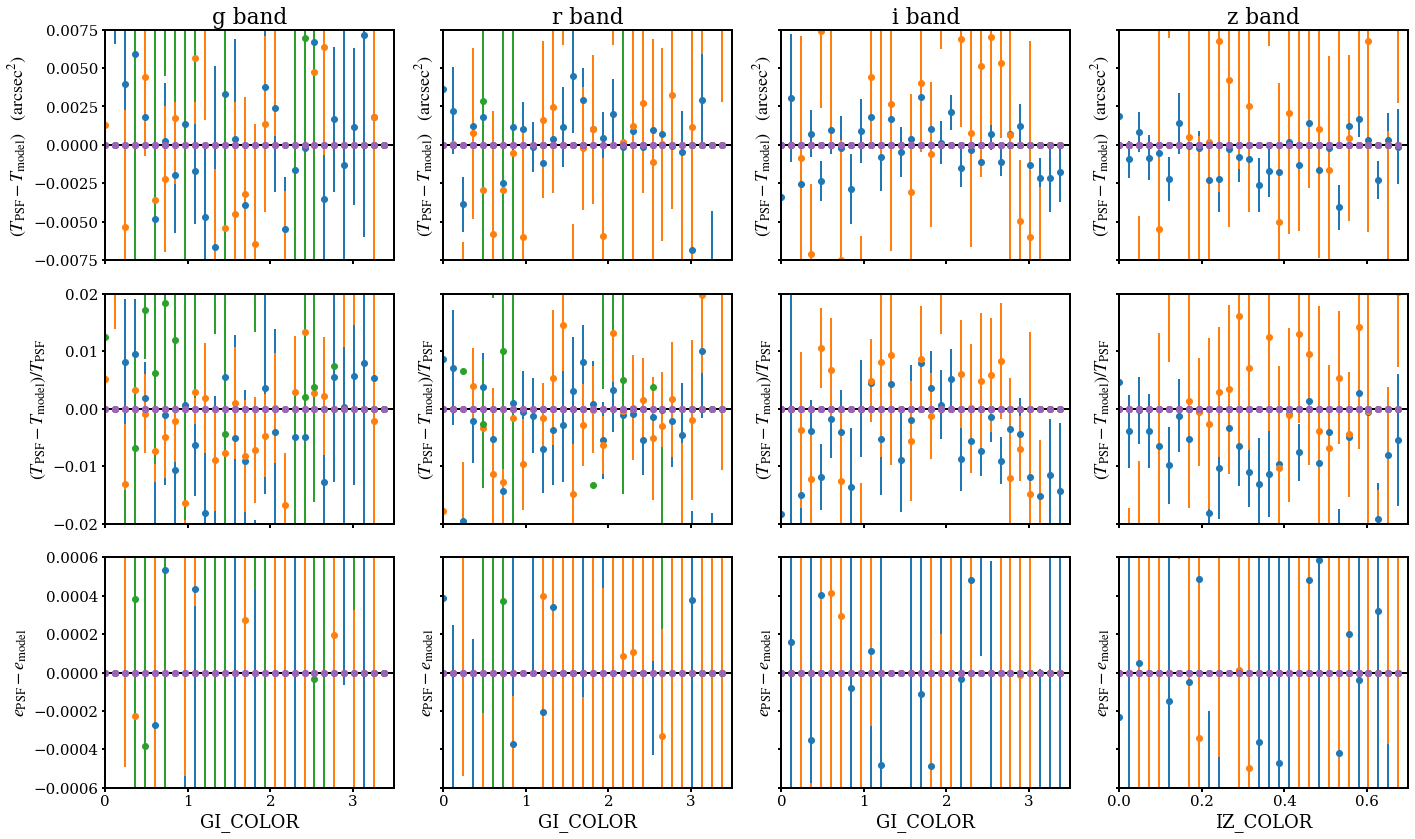

In [39]:
fig, axes = plt.subplots(3,4, figsize=(20,12), sharey='row', sharex='col')
tlims = [(0,0.6), (0.6,1.0), (1.0, 1.5), (1.5, 2.5)]
fwhmlims = [(0.5, 1.0), (1.0, 1.5), (1.5, 2.0), (2.0, 2.5), (2.5, 3.0)]
for i, band in enumerate(bands):
    data = cat[cat['BAND'] == band]
    if band == 'z':
        color = 'IZ_COLOR'
        cmax = 0.7
    else:
        color = 'GI_COLOR'
        cmax = 3.5
    fracsizeres, sizeres, e1res, e2res = compute_res(data)
    # zeropt = 30.
    # mag = zeropt - 2.5*np.log10(data['FLUX'])
    print('Total in band {}: '.format(band), len(data))
    for lims in fwhmlims:
        t_cut = np.logical_and(data['PSF_FWHM'] > lims[0], data['PSF_FWHM'] < lims[1])
        data_cut = data[t_cut]
        # mag_cut = mag[t_cut]
        fracsizeres_cut = fracsizeres[t_cut]
        sizeres_cut = sizeres[t_cut]
        e1res_cut = e1res[t_cut]
        e2res_cut = e2res[t_cut]

        print(band, '{} - {}asec: '.format(lims[0],lims[1]), len(data_cut), 'frac: ', len(data_cut)/len(data))
        (min_edge, max_edge, bins, 
         bin_dT, bin_dT_err, 
         bin_dTfrac, bin_dTfrac_err,
         bin_de1, bin_de1_err, 
         bin_de2, bin_de2_err) = bin_res_by_color(data_cut[color], sizeres_cut, fracsizeres_cut, 
                                                  e1res_cut, e2res_cut, max_edge=cmax)
        plot_bin_res(min_edge, max_edge, bins, bin_dT, bin_dT_err, bin_dTfrac,
                     bin_dTfrac_err, bin_de1, bin_de1_err, bin_de2, bin_de2_err,
                     axes=axes[:,i])

### Residuals vs. Magnitude

col_bins =  [14.         14.55172414 15.10344828 15.65517241 16.20689655 16.75862069
 17.31034483 17.86206897 18.4137931  18.96551724 19.51724138 20.06896552
 20.62068966 21.17241379 21.72413793 22.27586207 22.82758621 23.37931034
 23.93103448 24.48275862 25.03448276 25.5862069  26.13793103 26.68965517
 27.24137931 27.79310345 28.34482759 28.89655172 29.44827586 30.        ]
bin_dT =  [1.542762216382113, 1.1636759740157727, 0.7290543253728083, 0.7365170854612738, 0.7240052468861721, 0.7843830809229837, 0.7308031274881481, 0.726571517900198, 0.677861675331942, 0.772682969409828, 0.6848717241661408, 0.61607643837592, 0.4005690334341338, 0.6387031446738943, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
bin_dT_err =  [0.2729270169119295, 0.14350401380436434, 0.057791359567013714, 0.06497608003122546, 0.05408908146075596, 0.056915007869823474, 0.04607401903206974, 0.0377819803930133, 0.029553005440699342, 0.037903038773742535, 0.02941635332922535, 0.022339580731

/tmp/ipykernel_163967/1762131767.py:32: RuntimeWarning: Mean of empty slice.
  bin_dT = [dT[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_163967/1762131767.py:34: RuntimeWarning: Degrees of freedom <= 0 for slice
  bin_dT_err = [ np.sqrt(dT[index == i].var() / len(dT[index == i]))


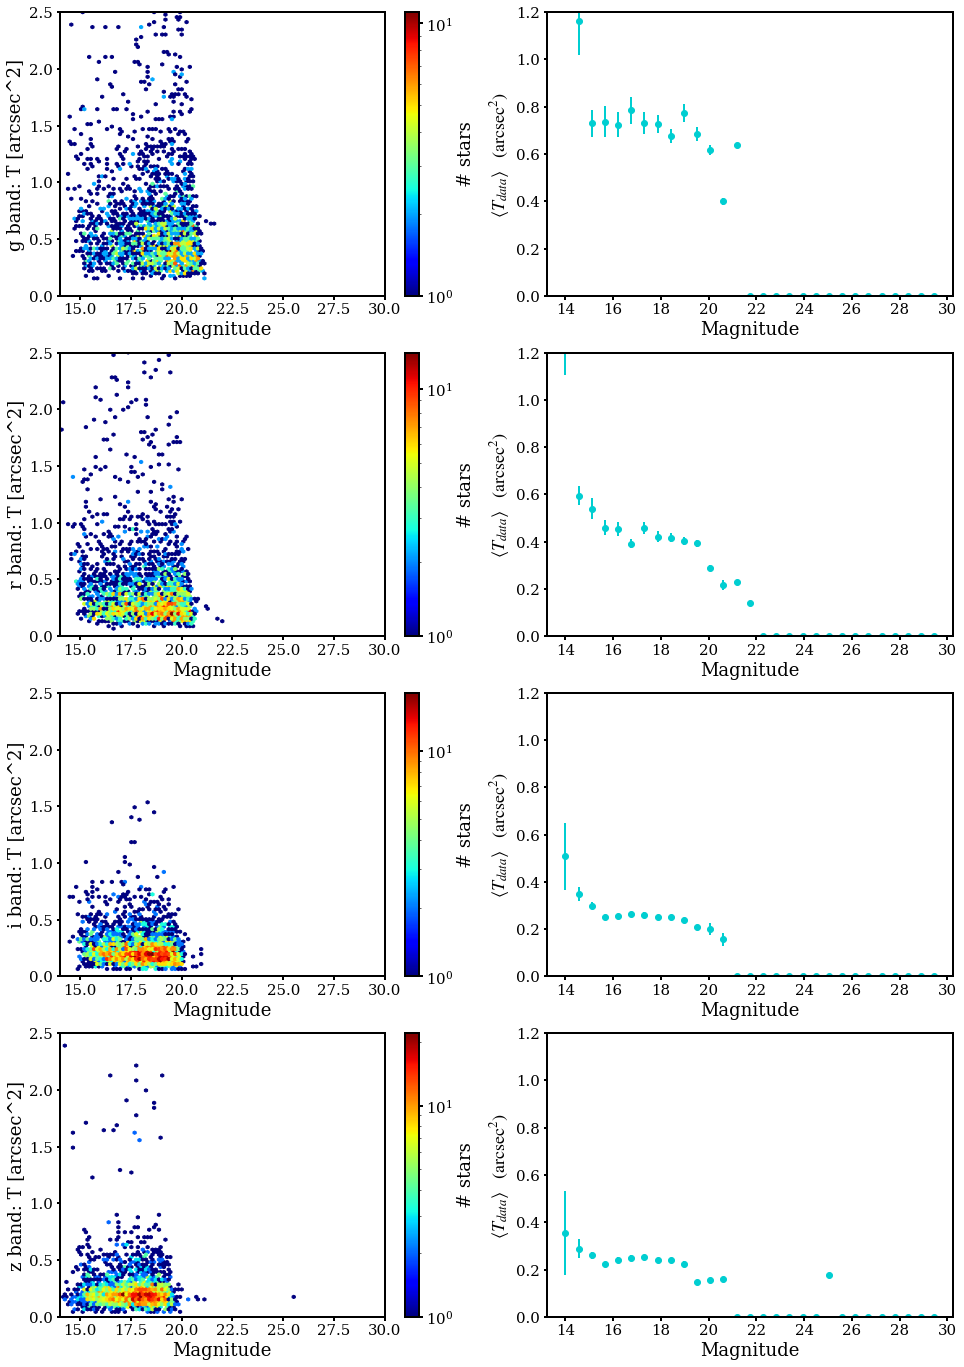

In [40]:
#plot size vs. color 2d hist and profile
fig, axs = plt.subplots(4,2, figsize=(16,24))
for i, band in enumerate(bands):
    ax = axs[i][0]
    data = cat[cat['BAND'] == band]
    #plot size vs color 2d hist with log density
    zeropt = 30.
    mag = zeropt - 2.5*np.log10(data['FLUX'])
    mmin = 14.
    mmax = 30.
    mmask = np.logical_and(mag > mmin, mag < mmax)
    mag = mag[mmask]
    data = data[mmask]
    size = data['T_DATA']
    cmap = plt.get_cmap('jet')
    im = ax.hexbin(mag, size, bins='log', mincnt=1, cmap=cmap, extent=(mmin, mmax, 0., 2.5))
    ax.set_ylim(0., 2.5)
    ax.set_xlim(mmin, mmax)
    ax.set_ylabel('{} band: T [arcsec^2]'.format(band))
    ax.set_xlabel('Magnitude')
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('# stars')
    
    #plot size vs color profile
    ax = axs[i][1]
    m = mag
    dT = size
    mag_bins = np.linspace(mmin, mmax, 30)
    print('col_bins = ',mag_bins)

    index = np.digitize(mag, mag_bins)
    bin_dT = [dT[index == i].mean() for i in range(1, len(mag_bins))]
    print('bin_dT = ',bin_dT)
    bin_dT_err = [ np.sqrt(dT[index == i].var() / len(dT[index == i]))
                    for i in range(1, len(mag_bins)) ]
    print('bin_dT_err = ',bin_dT_err)

    # Fix up nans
    for i in range(1,len(mag_bins)):
        if i not in index:
            bin_dT[i-1] = 0.
            bin_dT_err[i-1] = 0.
    
    ax.set_ylim(0., 1.2)
    #ax.plot([cmin,cmax], [0,0], color='black')
    #ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    #ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    t_line = ax.errorbar(mag_bins[:-1], bin_dT, yerr=bin_dT_err, color='darkturquoise', fmt='o')
    #ax.axhline(y=0.003, linewidth=4, color='grey')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.set_ylabel(r'$\left<T_{data}\right> \quad({\rm arcsec}^2)$')
    ax.set_xlabel('Magnitude')

In [41]:
def bin_by_mag(m, dT, dTfrac, de1, de2, mmin=15., mmax=21., min_mused=16.5, 
               label=None, axes=None, xlabel='Magnitude'):
    min_mag = mmin
    max_mag = mmax
    print(band, min_mag, max_mag)
    mag_bins = np.linspace(min_mag, max_mag,30)
    #print('col_bins = ',mag_bins)

    index = np.digitize(m, mag_bins)
    #print('len(index) = ',len(index))
    bin_de1 = [de1[index == i].mean() for i in range(1, len(mag_bins))]
    #print('bin_de1 = ',bin_de1)
    bin_de2 = [de2[index == i].mean() for i in range(1, len(mag_bins))]
    #print('bin_de2 = ',bin_de2)
    bin_dT = [dT[index == i].mean() for i in range(1, len(mag_bins))]
    #print('bin_dT = ',bin_dT)
    bin_dTfrac = [dTfrac[index == i].mean() for i in range(1, len(mag_bins))]
    #print('bin_dTfrac = ',bin_dTfrac)
    bin_de1_err = [ np.sqrt(de1[index == i].var() / len(de1[index == i]))
                    for i in range(1, len(mag_bins)) ]
    #print('bin_de1_err = ',bin_de1_err)
    bin_de2_err = [ np.sqrt(de2[index == i].var() / len(de2[index == i]))
                    for i in range(1, len(mag_bins)) ]
    #print('bin_de2_err = ',bin_de2_err)
    bin_dT_err = [ np.sqrt(dT[index == i].var() / len(dT[index == i]))
                    for i in range(1, len(mag_bins)) ]
    #print('bin_dT_err = ',bin_dT_err)
    bin_dTfrac_err = [ np.sqrt(dTfrac[index == i].var() / len(dTfrac[index == i]))
                    for i in range(1, len(mag_bins)) ]
    #print('bin_dTfrac_err = ',bin_dTfrac_err)

    # Fix up nans
    for i in range(1,len(mag_bins)):
        if i not in index:
            bin_de1[i-1] = 0.
            bin_de2[i-1] = 0.
            bin_dT[i-1] = 0.
            bin_dTfrac[i-1] = 0.
            bin_de1_err[i-1] = 0.
            bin_de2_err[i-1] = 0.
            bin_dT_err[i-1] = 0.
            bin_dTfrac_err[i-1] = 0.

    ax = axes[0]
    ax.set_title('{} band'.format(band))
    ax.set_ylim(-0.005,0.005)
    ax.plot([min_mag,max_mag], [0,0], color='black')
    ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.1)
    #t_line = ax.errorbar(mag_bins[:-1], bin_dT, yerr=bin_dT_err, color='blue', fmt='o')
    t_line = ax.errorbar(mag_bins[:-1], bin_dT, yerr=bin_dT_err, label=label, fmt='o')
    #ax.axhline(y=0.003, linewidth=4, color='grey')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model}) \quad({\rm arcsec}^2)$')

    ax = axes[1]
    ax.set_ylim(-0.02,0.02)
    ax.plot([min_mag,max_mag], [0,0], color='black')
    ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.1)
    #t_line = ax.errorbar(mag_bins[:-1], bin_dTfrac, yerr=bin_dTfrac_err, color='blue', fmt='o')
    t_line = ax.errorbar(mag_bins[:-1], bin_dTfrac, yerr=bin_dTfrac_err, label=label, fmt='o')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.legend(ncol=2, columnspacing=0.5)
    ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model})/ T_{\rm PSF}$')

    ax = axes[2]
    ax.set_ylim(-6.e-4,6.e-4)
    ax.plot([min_mag,max_mag], [0,0], color='black')
    ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.1)
    # e1_line = ax.errorbar(mag_bins[:-1], bin_de1, yerr=bin_de1_err, color='red', mfc='white', fmt='o')
    # e2_line = ax.errorbar(mag_bins[:-1], bin_de2, yerr=bin_de2_err, color='blue', fmt='o')
    e1_line = ax.errorbar(mag_bins[:-1], bin_de1, yerr=bin_de1_err, mfc='white', fmt='o', label=label)
    e2_line = ax.errorbar(mag_bins[:-1], bin_de2, yerr=bin_de2_err, fmt='o', label=label)
    #ax.axhline(y=0.0002, linewidth=4, color='grey')
    #ax.axhline(y=-0.0002, linewidth=4, color='grey')
    #ax.legend(ncol=2, columnspacing=0.5)
    ax.legend([e1_line, e2_line], [r'$e_1$', r'$e_2$'], loc='lower left')
    ax.set_ylabel(r'$e_{\rm PSF} - e_{\rm model}$')
    ax.set_xlim(min_mag,max_mag)
    ax.set_xlabel(xlabel)
    plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean de =  -0.00029711047164641816 0.0003155826590856598
mean dt =  0.0027544029841508793
Total in band:  2205
g 15.0 21.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean de =  -0.00022657906217277715 0.0004582833189728438
mean dt =  -0.00018633795724147404
Total in band:  2587
r 15.0 21.0
mean de =  -0.00043476015149837495 2.254363266051636e-05
mean dt =  0.00040586358985394863
Total in band:  2809
i 15.0 21.0


/tmp/ipykernel_68816/3908194940.py:11: RuntimeWarning: Mean of empty slice.
  bin_de1 = [de1[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_68816/3908194940.py:13: RuntimeWarning: Mean of empty slice.
  bin_de2 = [de2[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_68816/3908194940.py:15: RuntimeWarning: Mean of empty slice.
  bin_dT = [dT[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_68816/3908194940.py:17: RuntimeWarning: Mean of empty slice.
  bin_dTfrac = [dTfrac[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_68816/3908194940.py:19: RuntimeWarning: Degrees of freedom <= 0 for slice
  bin_de1_err = [ np.sqrt(de1[index == i].var() / len(de1[index == i]))
/tmp/ipykernel_68816/3908194940.py:22: RuntimeWarning: Degrees of freedom <= 0 for slice
  bin_de2_err = [ np.sqrt(de2[index == i].var() / len(de2[index == i]))
/tmp/ipykernel_68816/3908194940.py:25: RuntimeWarning: Degrees of freedom <= 0 for slice
 

mean de =  0.00015084286254890873 5.90418074626757e-05
mean dt =  0.0005650678548482299
Total in band:  2391
z 15.0 21.0


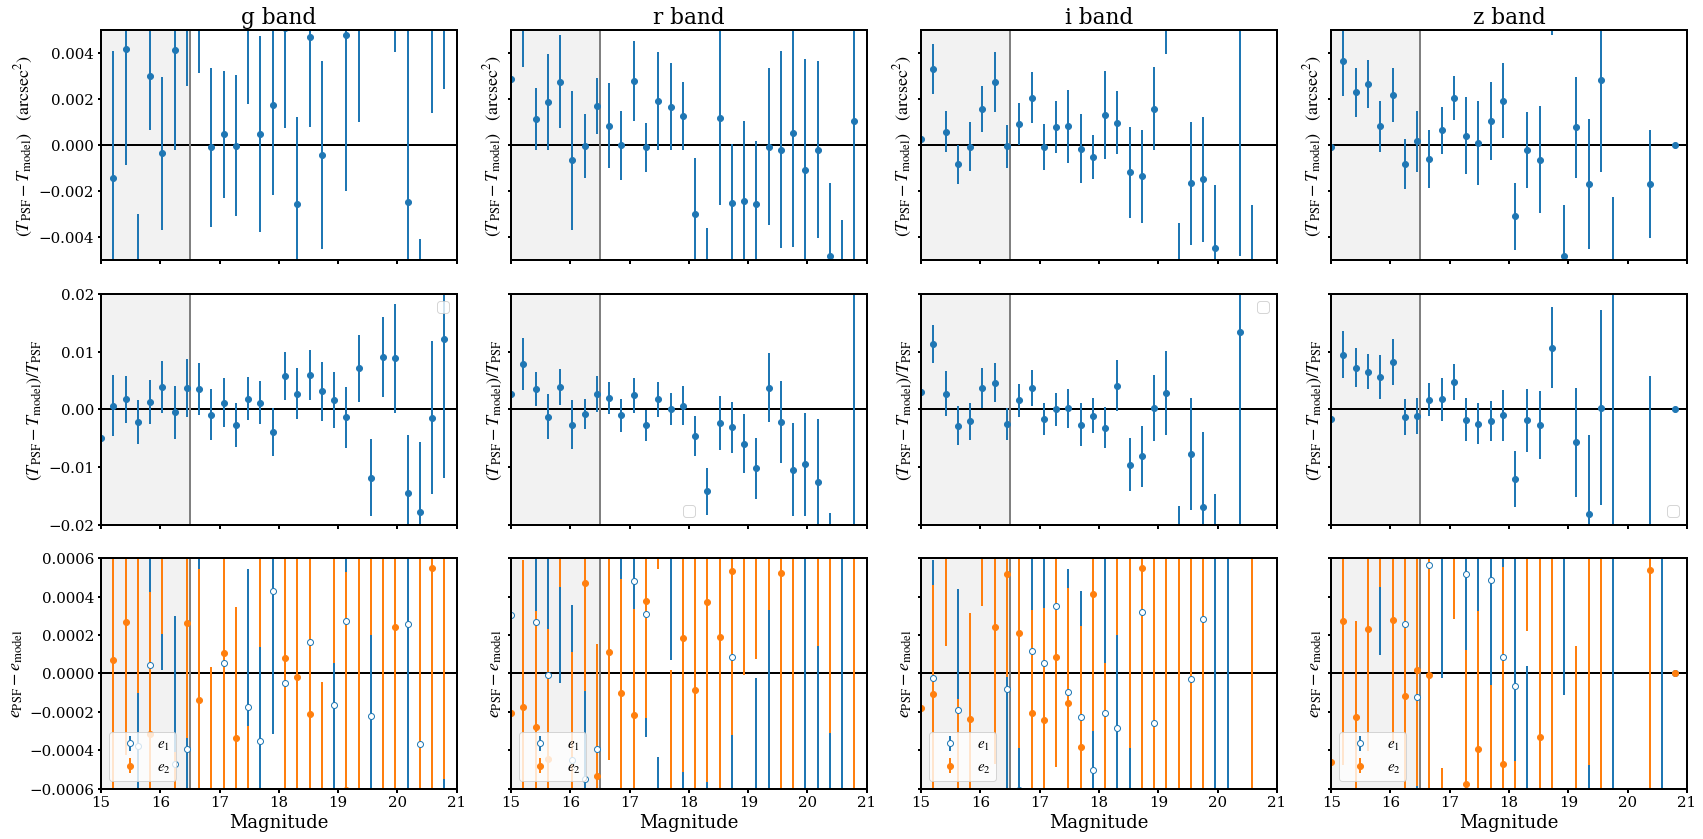

In [67]:
fig, axes = plt.subplots(3,4, figsize=(24,12), sharey='row', sharex='col')
# tlims = [(0,0.6), (0.6,1.0), (1.0, 1.5), (1.5, 2.5)]
for i, band in enumerate(bands):
    data = cat[cat['BAND'] == band]
    fracsizeres, sizeres, e1res, e2res = compute_res(data)
    zeropt = 30.
    mag = zeropt - 2.5*np.log10(data['FLUX'])
    print('Total in band: ', len(data))

    bin_by_mag(mag, sizeres, fracsizeres, e1res, e2res, axes=axes[:,i])

mean de =  0.00022047726889770937 3.378330033125623e-05
mean dt =  0.004042903215106737
Total in band:  2216
g 0.5 - 1.0asec:  591 frac:  0.2666967509025271
g 15.0 21.0
g 1.0 - 1.5asec:  1511 frac:  0.6818592057761733
g 15.0 21.0
g 1.5 - 2.0asec:  108 frac:  0.048736462093862815
g 15.0 21.0
g 2.0 - 3.0asec:  0 frac:  0.0
g 15.0 21.0


/tmp/ipykernel_163967/3908194940.py:11: RuntimeWarning: Mean of empty slice.
  bin_de1 = [de1[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_163967/3908194940.py:13: RuntimeWarning: Mean of empty slice.
  bin_de2 = [de2[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_163967/3908194940.py:15: RuntimeWarning: Mean of empty slice.
  bin_dT = [dT[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_163967/3908194940.py:17: RuntimeWarning: Mean of empty slice.
  bin_dTfrac = [dTfrac[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_163967/3908194940.py:19: RuntimeWarning: Degrees of freedom <= 0 for slice
  bin_de1_err = [ np.sqrt(de1[index == i].var() / len(de1[index == i]))
/tmp/ipykernel_163967/3908194940.py:22: RuntimeWarning: Degrees of freedom <= 0 for slice
  bin_de2_err = [ np.sqrt(de2[index == i].var() / len(de2[index == i]))
/tmp/ipykernel_163967/3908194940.py:25: RuntimeWarning: Degrees of freedom <= 0 for 

mean de =  0.00014870929995198544 2.443059418095236e-05
mean dt =  1.3832648330946608e-05
Total in band:  2523
r 0.5 - 1.0asec:  1662 frac:  0.6587395957193817
r 15.0 21.0
r 1.0 - 1.5asec:  832 frac:  0.3297661514070551
r 15.0 21.0
r 1.5 - 2.0asec:  29 frac:  0.011494252873563218
r 15.0 21.0
r 2.0 - 3.0asec:  0 frac:  0.0
r 15.0 21.0
mean de =  0.0001641452875968271 9.20914224223563e-05
mean dt =  0.00015818190563034111
Total in band:  2687
i 0.5 - 1.0asec:  2413 frac:  0.8980275400074432
i 15.0 21.0
i 1.0 - 1.5asec:  273 frac:  0.10160029772981019
i 15.0 21.0
i 1.5 - 2.0asec:  0 frac:  0.0
i 15.0 21.0
i 2.0 - 3.0asec:  0 frac:  0.0
i 15.0 21.0
mean de =  -0.00014661045369949527 -0.00020486546620979157
mean dt =  -0.0005358448740069293
Total in band:  2574
z 0.5 - 1.0asec:  2359 frac:  0.9164724164724165
z 15.0 21.0
z 1.0 - 1.5asec:  212 frac:  0.08236208236208237
z 15.0 21.0
z 1.5 - 2.0asec:  0 frac:  0.0
z 15.0 21.0
z 2.0 - 3.0asec:  0 frac:  0.0
z 15.0 21.0


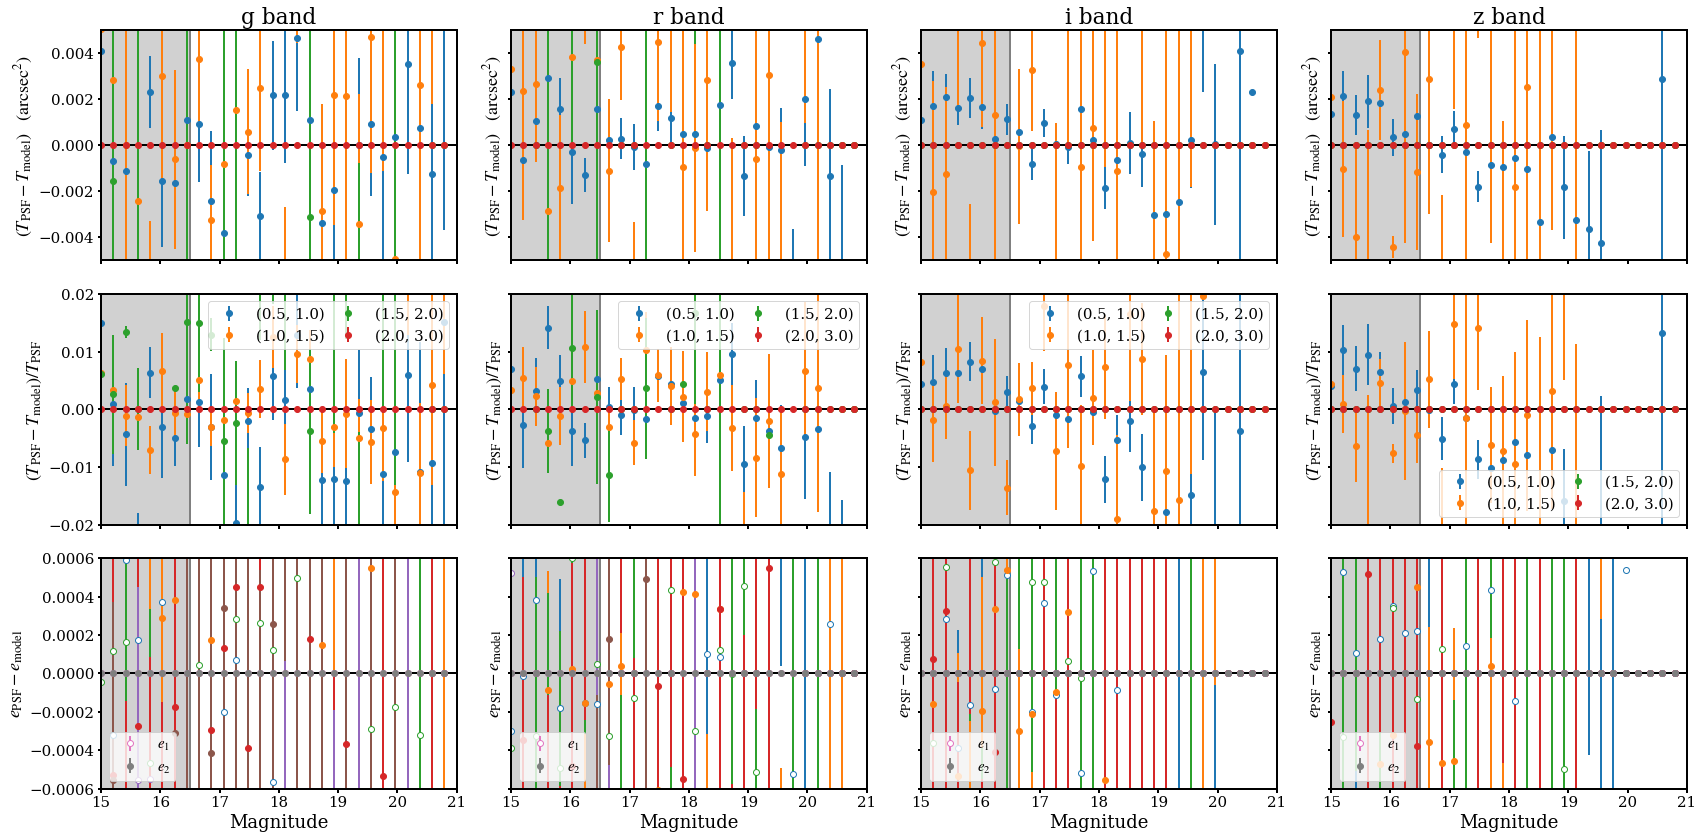

In [42]:
fig, axes = plt.subplots(3,4, figsize=(24,12), sharey='row', sharex='col')
tlims = [(0,0.6), (0.6,1.0), (1.0, 1.5), (1.5, 2.5)]
fwhmlims = [(0.5, 1.0), (1.0, 1.5), (1.5, 2.0), (2.0, 3.0)]
for i, band in enumerate(bands):
    data = cat[cat['BAND'] == band]
    fracsizeres, sizeres, e1res, e2res = compute_res(data)
    zeropt = 30.
    mag = zeropt - 2.5*np.log10(data['FLUX'])
    print('Total in band: ', len(data))
    for lims in fwhmlims:
        t_cut = np.logical_and(data['PSF_FWHM'] > lims[0], data['PSF_FWHM'] < lims[1])
        mag_cut = mag[t_cut]
        fracsizeres_cut = fracsizeres[t_cut]
        sizeres_cut = sizeres[t_cut]
        e1res_cut = e1res[t_cut]
        e2res_cut = e2res[t_cut]

        print(band, '{} - {}asec: '.format(lims[0],lims[1]), len(mag_cut), 'frac: ', len(mag_cut)/len(data))
        bin_by_mag(mag_cut, sizeres_cut, fracsizeres_cut, e1res_cut, e2res_cut, axes=axes[:,i], label=str(lims))

/tmp/ipykernel_163967/3908194940.py:11: RuntimeWarning: Mean of empty slice.
  bin_de1 = [de1[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_163967/3908194940.py:13: RuntimeWarning: Mean of empty slice.
  bin_de2 = [de2[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_163967/3908194940.py:15: RuntimeWarning: Mean of empty slice.
  bin_dT = [dT[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_163967/3908194940.py:17: RuntimeWarning: Mean of empty slice.
  bin_dTfrac = [dTfrac[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_163967/3908194940.py:19: RuntimeWarning: Degrees of freedom <= 0 for slice
  bin_de1_err = [ np.sqrt(de1[index == i].var() / len(de1[index == i]))
/tmp/ipykernel_163967/3908194940.py:22: RuntimeWarning: Degrees of freedom <= 0 for slice
  bin_de2_err = [ np.sqrt(de2[index == i].var() / len(de2[index == i]))
/tmp/ipykernel_163967/3908194940.py:25: RuntimeWarning: Degrees of freedom <= 0 for 

mean de =  0.00022047726889770937 3.378330033125623e-05
mean dt =  0.004042903215106737
Total in band:  2216
g 0.5 3.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean de =  0.00014870929995198544 2.443059418095236e-05
mean dt =  1.3832648330946608e-05
Total in band:  2523
r 0.5 3.0
mean de =  0.0001641452875968271 9.20914224223563e-05
mean dt =  0.00015818190563034111
Total in band:  2687
i 0.5 3.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean de =  -0.00014661045369949527 -0.00020486546620979157
mean dt =  -0.0005358448740069293
Total in band:  2574
z 0.5 3.0


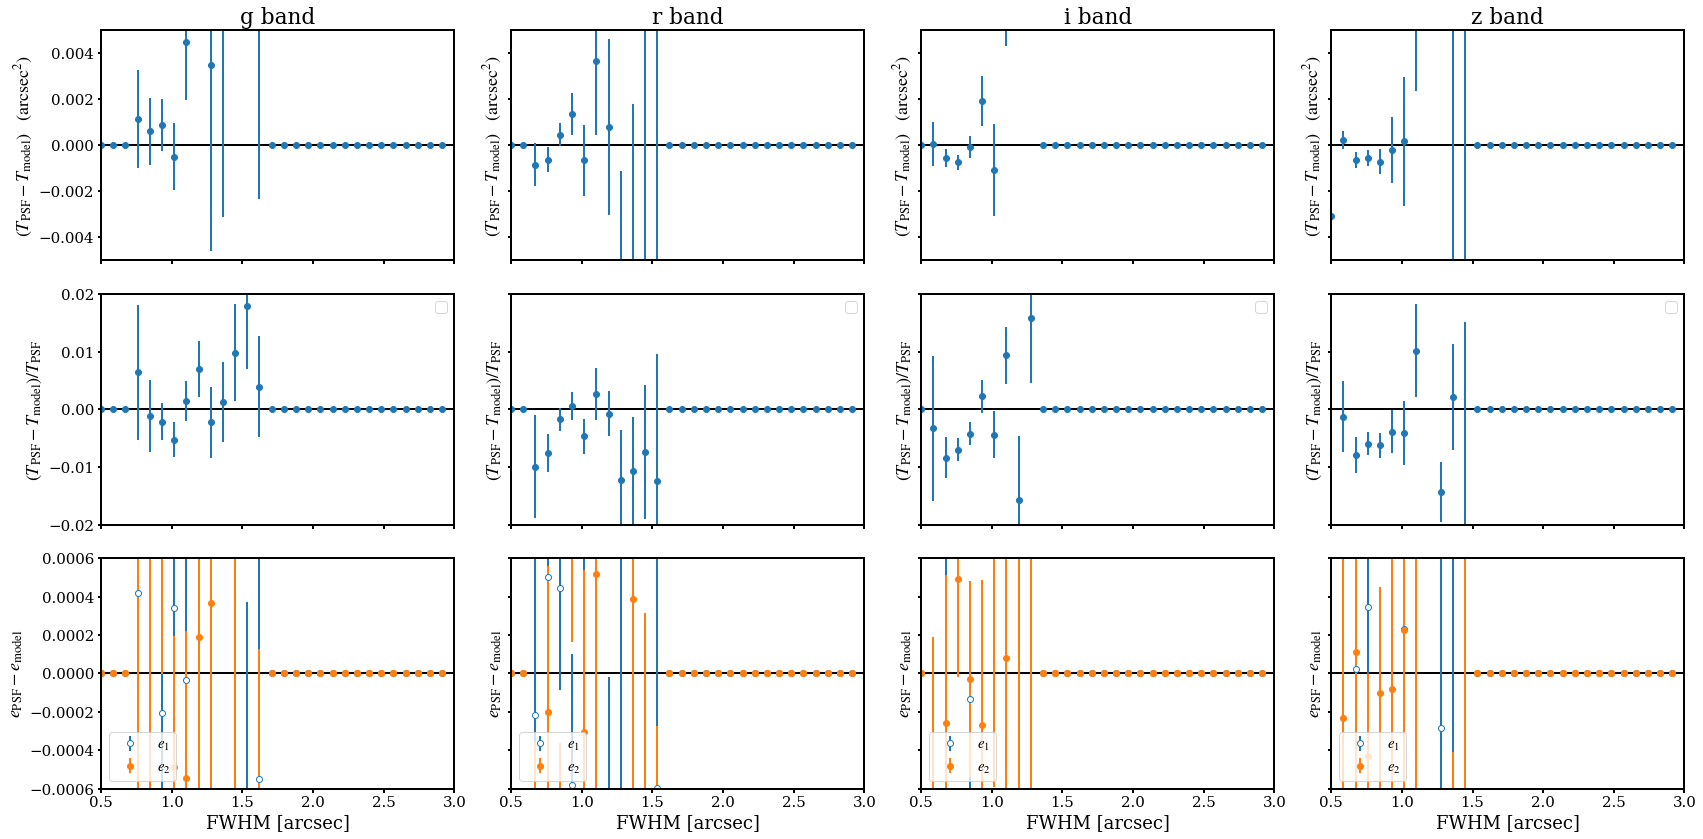

In [43]:
fig, axes = plt.subplots(3,4, figsize=(24,12), sharey='row', sharex='col')
for i, band in enumerate(bands):
    data = cat[cat['BAND'] == band]
    fracsizeres, sizeres, e1res, e2res = compute_res(data)
    print('Total in band: ', len(data))

    bin_by_mag(data['PSF_FWHM'], sizeres, fracsizeres, e1res, e2res, mmin=0.5, mmax=3.0, min_mused=0, 
               axes=axes[:,i], xlabel='FWHM [arcsec]')

/tmp/ipykernel_163967/3908194940.py:11: RuntimeWarning: Mean of empty slice.
  bin_de1 = [de1[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_163967/3908194940.py:13: RuntimeWarning: Mean of empty slice.
  bin_de2 = [de2[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_163967/3908194940.py:15: RuntimeWarning: Mean of empty slice.
  bin_dT = [dT[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_163967/3908194940.py:17: RuntimeWarning: Mean of empty slice.
  bin_dTfrac = [dTfrac[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_163967/3908194940.py:19: RuntimeWarning: Degrees of freedom <= 0 for slice
  bin_de1_err = [ np.sqrt(de1[index == i].var() / len(de1[index == i]))
/tmp/ipykernel_163967/3908194940.py:22: RuntimeWarning: Degrees of freedom <= 0 for slice
  bin_de2_err = [ np.sqrt(de2[index == i].var() / len(de2[index == i]))
/tmp/ipykernel_163967/3908194940.py:25: RuntimeWarning: Degrees of freedom <= 0 for 

mean de =  0.00022047726889770937 3.378330033125623e-05
mean dt =  0.004042903215106737
Total in band:  2216
g 0.0 3.5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean de =  0.00014870929995198544 2.443059418095236e-05
mean dt =  1.3832648330946608e-05
Total in band:  2523
r 0.0 3.5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean de =  0.0001641452875968271 9.20914224223563e-05
mean dt =  0.00015818190563034111
Total in band:  2687
i 0.0 3.5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean de =  -0.00014661045369949527 -0.00020486546620979157
mean dt =  -0.0005358448740069293
Total in band:  2574
z 0.0 3.5


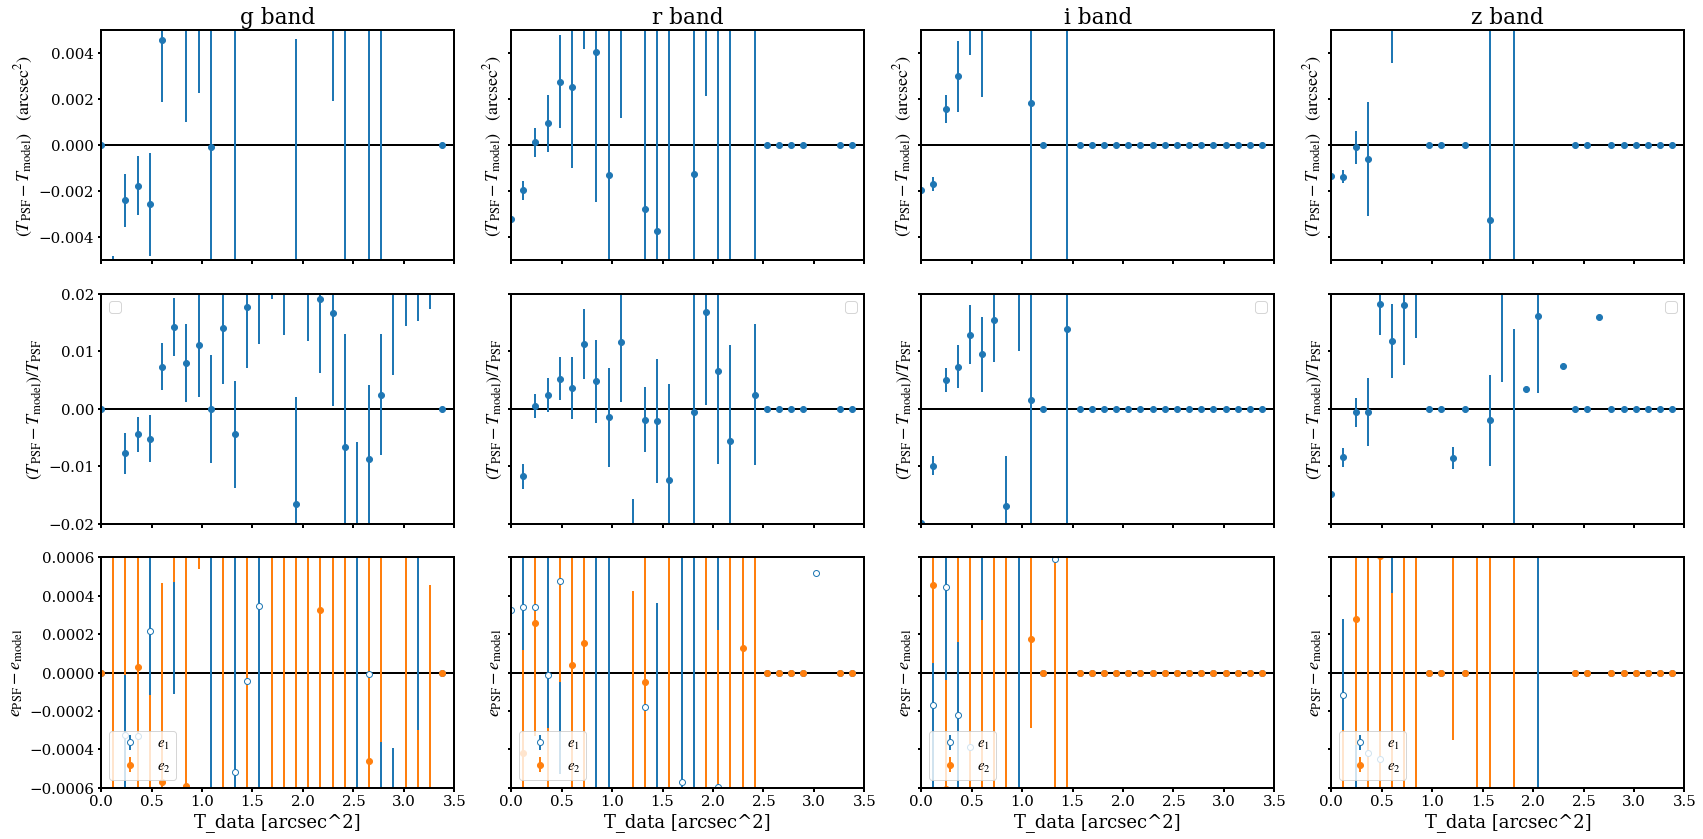

In [44]:
fig, axes = plt.subplots(3,4, figsize=(24,12), sharey='row', sharex='col')
for i, band in enumerate(bands):
    data = cat[cat['BAND'] == band]
    fracsizeres, sizeres, e1res, e2res = compute_res(data)
    print('Total in band: ', len(data))

    bin_by_mag(data['T_DATA'], sizeres, fracsizeres, e1res, e2res, mmin=0., mmax=3.5, min_mused=0,
               axes=axes[:,i], xlabel='T_data [arcsec^2]')

### cutting FWHM>1.5asec

In [45]:
cat2 = cat[cat['PSF_FWHM'] < 1.5]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean de =  0.00028491772583750786 4.7714329962259987e-05
mean dt =  0.002568351584750803
Total in band:  2108
g 15.0 21.0


/tmp/ipykernel_163967/3908194940.py:11: RuntimeWarning: Mean of empty slice.
  bin_de1 = [de1[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_163967/3908194940.py:13: RuntimeWarning: Mean of empty slice.
  bin_de2 = [de2[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_163967/3908194940.py:15: RuntimeWarning: Mean of empty slice.
  bin_dT = [dT[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_163967/3908194940.py:17: RuntimeWarning: Mean of empty slice.
  bin_dTfrac = [dTfrac[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_163967/3908194940.py:19: RuntimeWarning: Degrees of freedom <= 0 for slice
  bin_de1_err = [ np.sqrt(de1[index == i].var() / len(de1[index == i]))
/tmp/ipykernel_163967/3908194940.py:22: RuntimeWarning: Degrees of freedom <= 0 for slice
  bin_de2_err = [ np.sqrt(de2[index == i].var() / len(de2[index == i]))
/tmp/ipykernel_163967/3908194940.py:25: RuntimeWarning: Degrees of freedom <= 0 for 

mean de =  0.00012829119376064546 5.6589062336992925e-05
mean dt =  0.00010283071197222486
Total in band:  2494
r 15.0 21.0
mean de =  0.0001641452875968271 9.20914224223563e-05
mean dt =  0.00015818190563034111
Total in band:  2687
i 15.0 21.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean de =  -0.00014661045369949527 -0.00020486546620979157
mean dt =  -0.0005358448740069293
Total in band:  2574
z 15.0 21.0


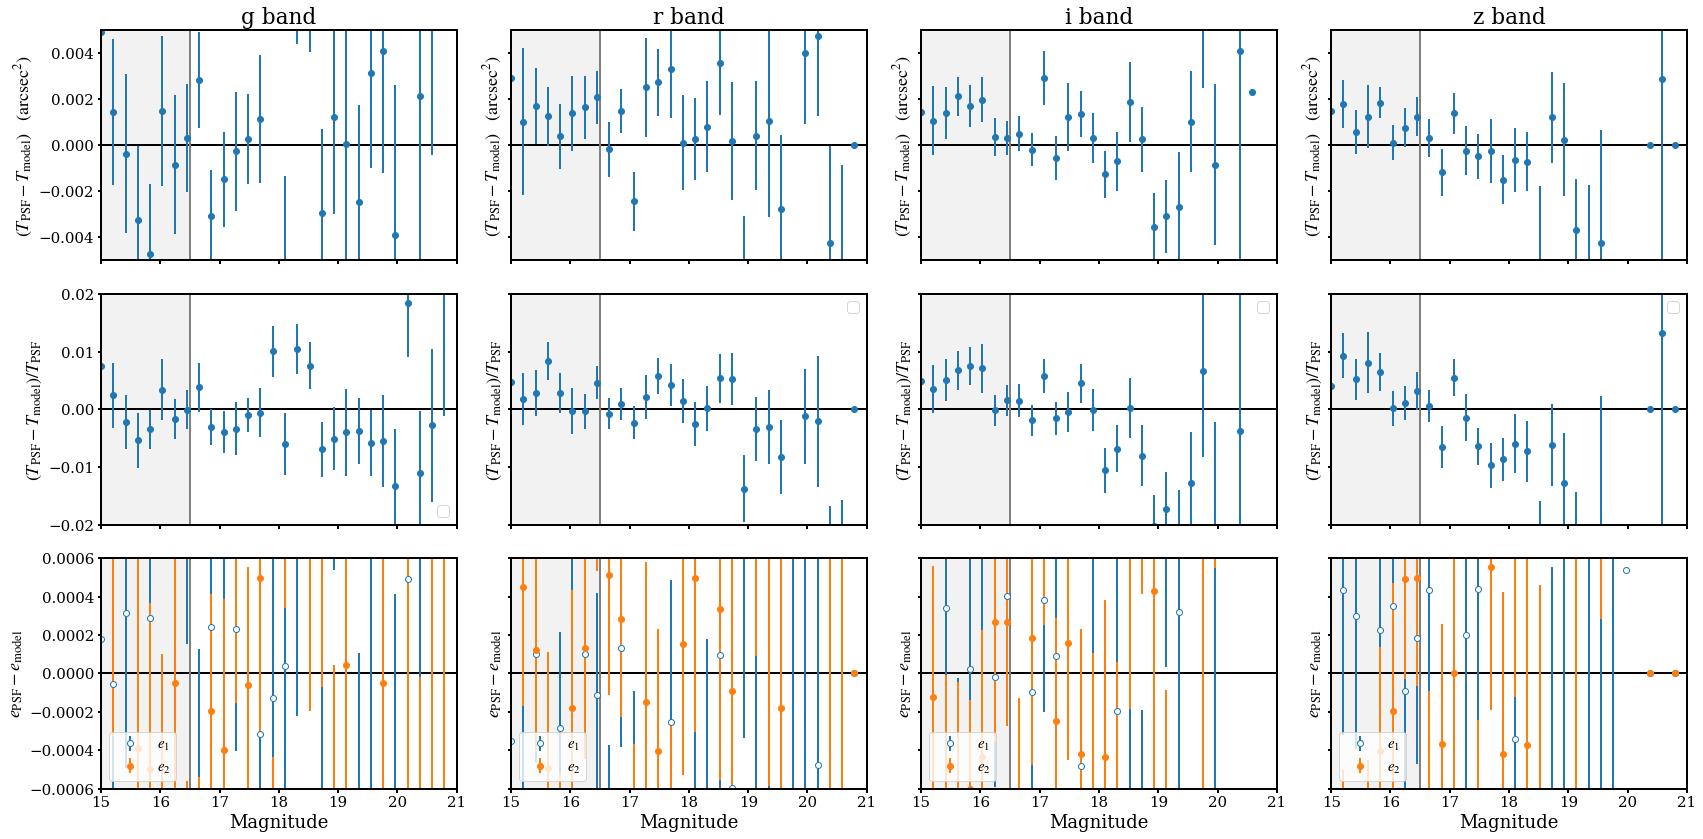

In [46]:
fig, axes = plt.subplots(3,4, figsize=(24,12), sharey='row', sharex='col')
# tlims = [(0,0.6), (0.6,1.0), (1.0, 1.5), (1.5, 2.5)]
for i, band in enumerate(bands):
    data = cat2[cat2['BAND'] == band]
    fracsizeres, sizeres, e1res, e2res = compute_res(data)
    zeropt = 30.
    mag = zeropt - 2.5*np.log10(data['FLUX'])
    print('Total in band: ', len(data))

    bin_by_mag(mag, sizeres, fracsizeres, e1res, e2res, axes=axes[:,i])

### cutting T>1.5asec^2

In [73]:
cat2 = cat[cat['T_DATA'] < 1.5]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean de =  -0.0003834205802233955 0.0003039259298249859
mean dt =  0.0010130028618444168
Total in band:  2023
g 15.0 21.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean de =  -0.00027344633294432494 0.00045709832106799567
mean dt =  -0.00039892015445191603
Total in band:  2515
r 15.0 21.0
mean de =  -0.00045306803802437346 7.145172653622791e-06
mean dt =  0.0001033523683351606
Total in band:  2797
i 15.0 21.0


/tmp/ipykernel_68816/3908194940.py:11: RuntimeWarning: Mean of empty slice.
  bin_de1 = [de1[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_68816/3908194940.py:13: RuntimeWarning: Mean of empty slice.
  bin_de2 = [de2[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_68816/3908194940.py:15: RuntimeWarning: Mean of empty slice.
  bin_dT = [dT[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_68816/3908194940.py:17: RuntimeWarning: Mean of empty slice.
  bin_dTfrac = [dTfrac[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_68816/3908194940.py:19: RuntimeWarning: Degrees of freedom <= 0 for slice
  bin_de1_err = [ np.sqrt(de1[index == i].var() / len(de1[index == i]))
/tmp/ipykernel_68816/3908194940.py:22: RuntimeWarning: Degrees of freedom <= 0 for slice
  bin_de2_err = [ np.sqrt(de2[index == i].var() / len(de2[index == i]))
/tmp/ipykernel_68816/3908194940.py:25: RuntimeWarning: Degrees of freedom <= 0 for slice
 

mean de =  0.00018124112336103643 2.4211166142640287e-05
mean dt =  0.00033892604771163204
Total in band:  2370
z 15.0 21.0


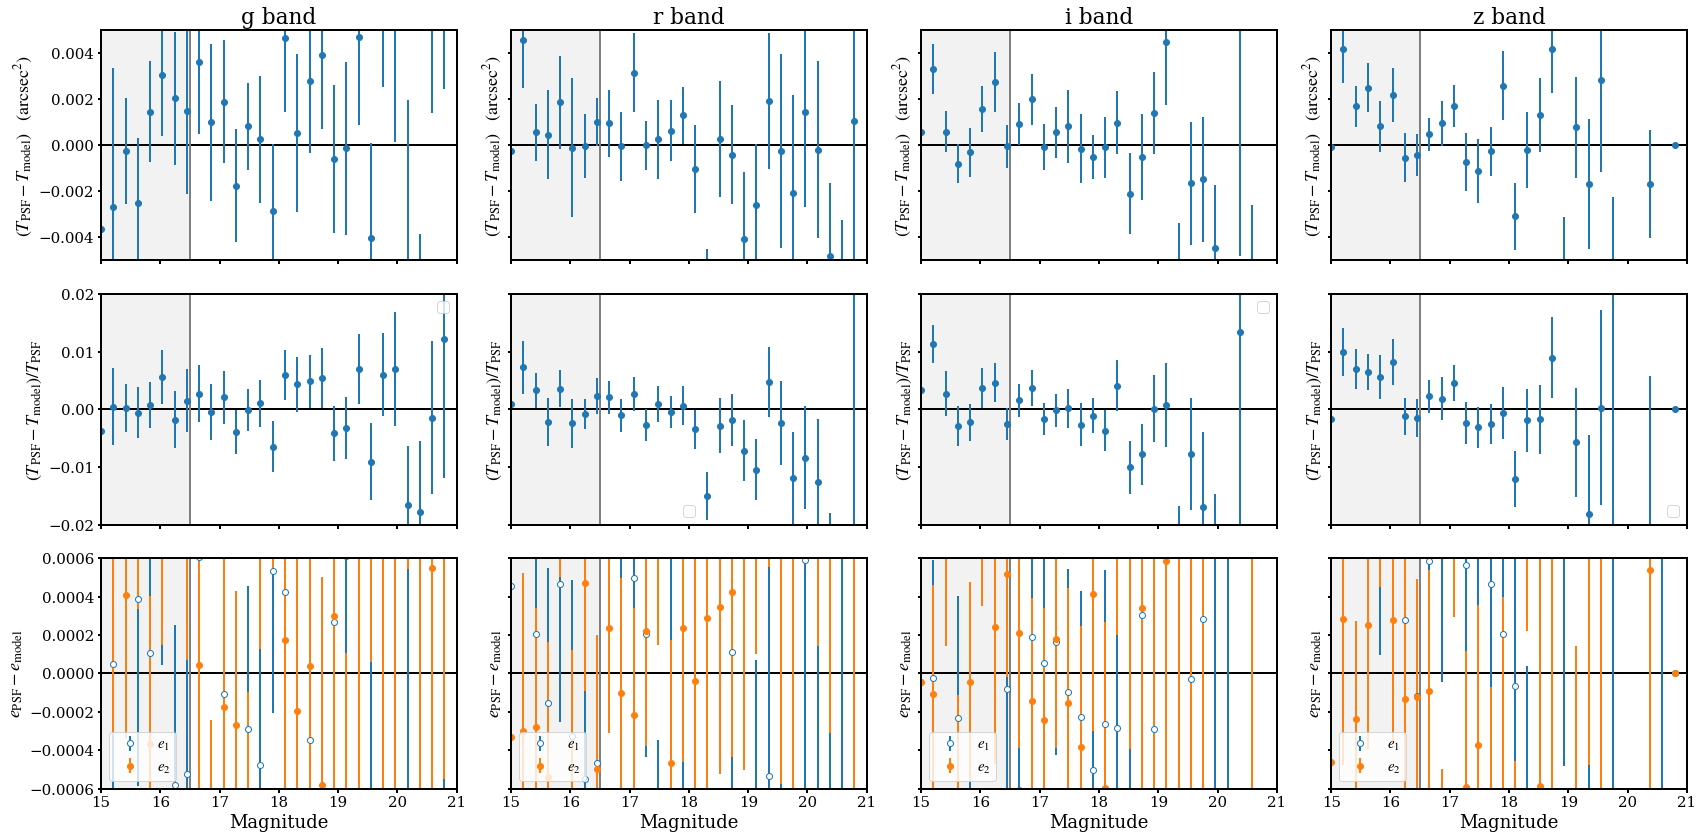

In [74]:
fig, axes = plt.subplots(3,4, figsize=(24,12), sharey='row', sharex='col')
# tlims = [(0,0.6), (0.6,1.0), (1.0, 1.5), (1.5, 2.5)]
for i, band in enumerate(bands):
    data = cat2[cat2['BAND'] == band]
    fracsizeres, sizeres, e1res, e2res = compute_res(data)
    zeropt = 30.
    mag = zeropt - 2.5*np.log10(data['FLUX'])
    print('Total in band: ', len(data))

    bin_by_mag(mag, sizeres, fracsizeres, e1res, e2res, axes=axes[:,i])